<a href="https://colab.research.google.com/github/MrCee95/Employee-Attrition/blob/main/Employee%20Attrition%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 #Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#@title Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx to Hash-Analytic-Python-Analytics-Problem-case-study-1 (1).xlsx


In [8]:
# Importing the dataset from excel file

excelfile=pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")

df_left=pd.read_excel(excelfile,'Employees who have left')  # Sheet 2
df_notleft=pd.read_excel(excelfile,'Existing employees')    # Sheet 3

In [9]:
#@title Reading file
df_left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [10]:
#@title Reading file
df_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [11]:
#@title
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [12]:
#@title Number of mployees in each department
df_left.dept.value_counts()

,count
dept,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [13]:
# Combining the IT, support and Technical in one value as Technical

df_left['dept']=np.where(df_left['dept']=='support','technical',df_left['dept']).astype('str')
df_left['dept']=np.where(df_left['dept']=='IT','technical',df_left['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='support','technical',df_notleft['dept']).astype('str')
df_notleft['dept']=np.where(df_notleft['dept']=='IT','technical',df_notleft['dept']).astype('str')

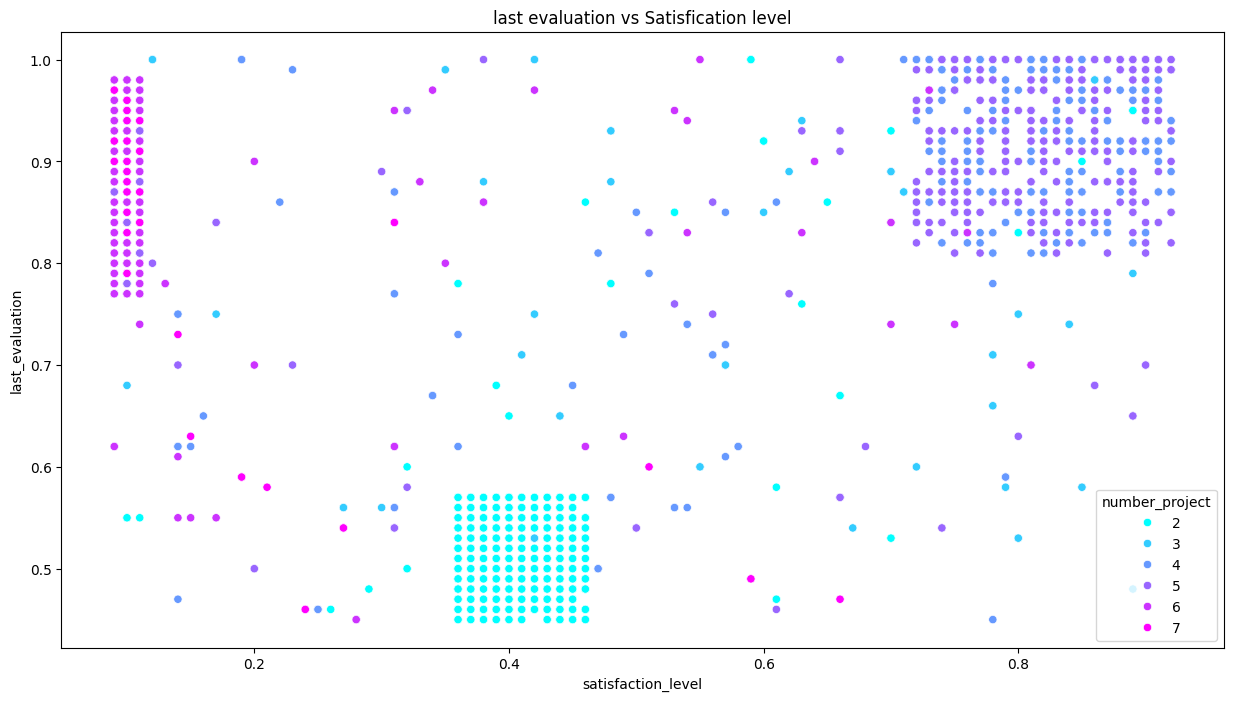

In [14]:
#@title Compare values of the employees based on each factor and the reason why they are leaving.
plt.figure(figsize=(15,8))
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=df_left['satisfaction_level'],y=df_left['last_evaluation'],hue='number_project',data=df_left, palette='cool')
plt.show()

from the above plot, we draw the following points:

    Satisfaction level is very low for employees who has number of projects more than 4
    Last evaluation for employees having number of projects equal to 2 is low, also they have low satisfaction level.

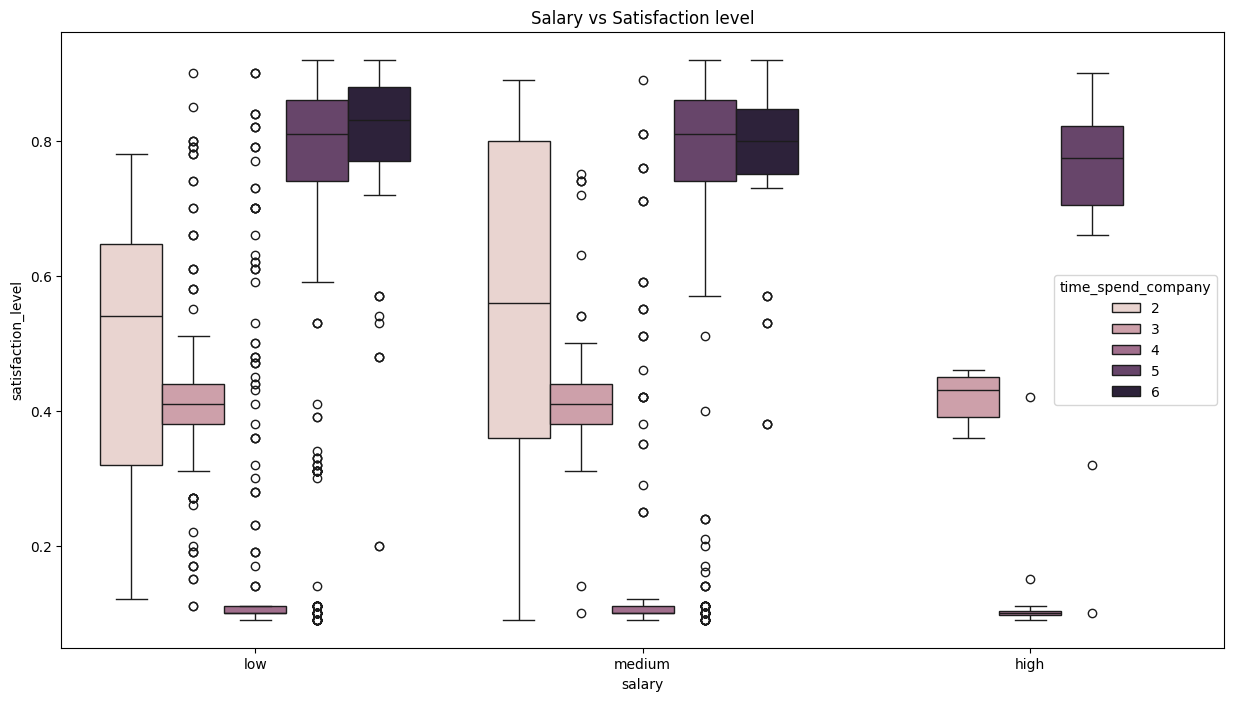

In [15]:
 #compare the Salary vs Satisfaction level based on the time spent in the company
plt.figure(figsize=(15,8))
plt.title('Salary vs Satisfaction level')
sns.boxplot(x=df_left['salary'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()


from the above plot, we draw the following points:

*   Satisfcation level is very low for employees who spent time in the company equal to 4 for all levels of salary.

*   For low salary employees, most of the employees belong to the 2nd quartile with less satisfaction levels as we can see the median is shifted to the upper quartile.
*   We can see there are so many oultiers from each salary levels.
*   The box plot is bigger for meduim salary emplyoees who spent time in the company is equal to 2, 50% of these employees have low satifaction levels.
    


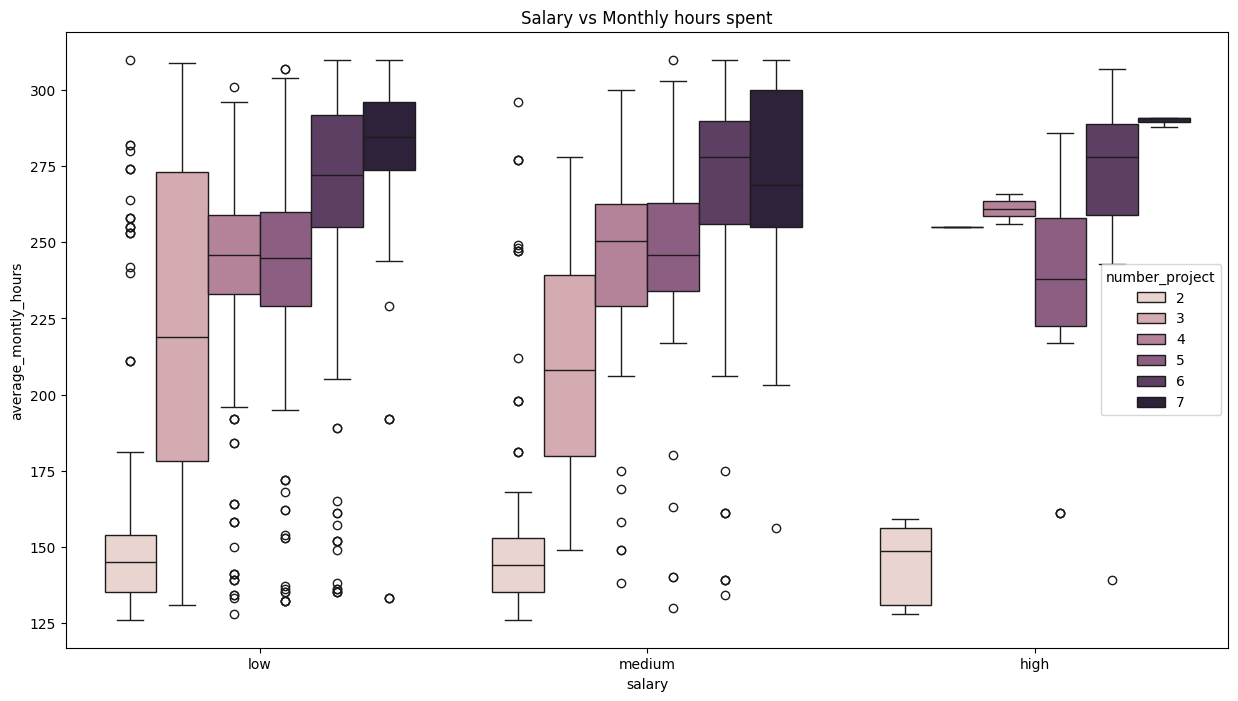

In [16]:
#compare the Salary vs Monthly hours spent based upon the number of projects that they have done
plt.figure(figsize=(15,8))
plt.title("Salary vs Monthly hours spent")
sns.boxplot(x=df_left['salary'],y=df_left['average_montly_hours'],hue='number_project',data=df_left)
plt.show()



Point drawn from above plot:

* Avereage monlthy hours is very low for employees who has number of projects equal to 2 for all levels of salary.
*   As we can see from the plot the employees from all levels for salary are loaded with projets and monthly hours is high.
*   We can see there are so many oultiers from low and meduim salary levels.
*   The box plot is bigger for low salary emplyoees who has number of projects equal to 3, 50% of these employees high monthly hours.



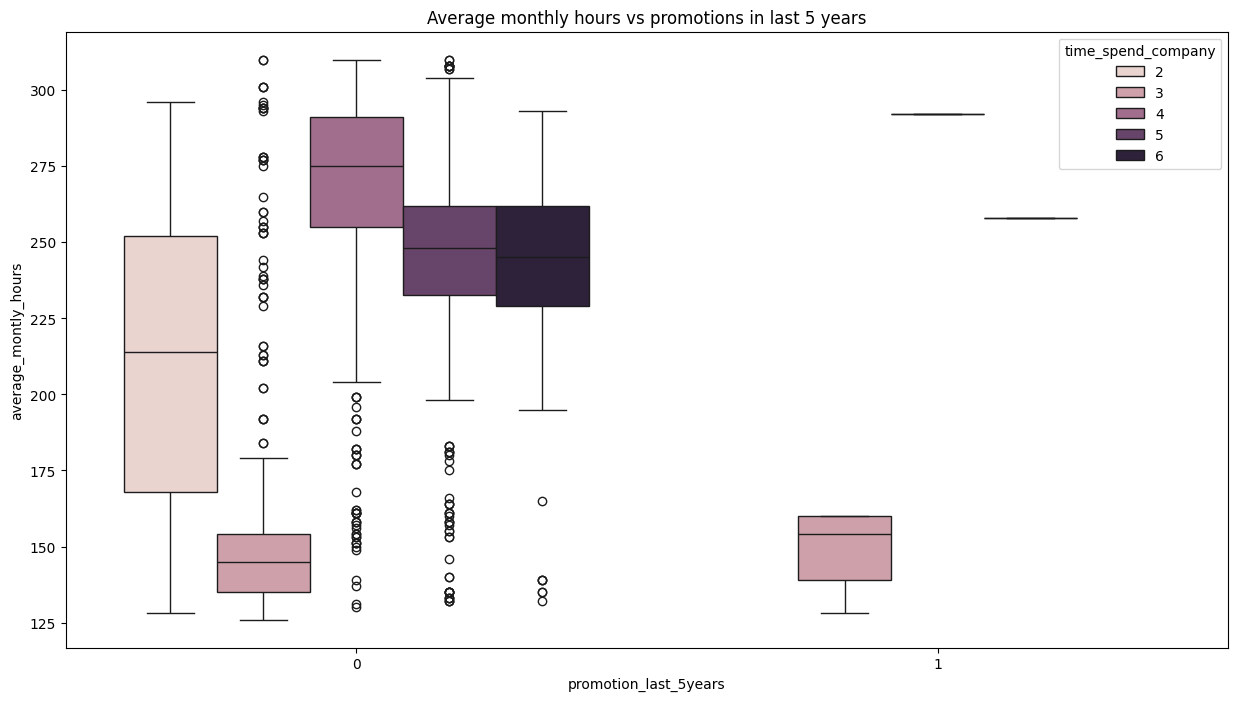

In [17]:
#More reasons for why the employees left
plt.figure(figsize=(15,8))
plt.title("Average monthly hours vs promotions in last 5 years")
sns.boxplot(x=df_left['promotion_last_5years'],y=df_left['average_montly_hours'],hue='time_spend_company',data=df_left)
plt.show()


Interesting points drawn from above plot:

*   Employees who got promotion in last 5 years have less average monthly hours, that to who has spend exactly 3 years in the company.
*   Very few employees from higher duration time spend in the comapny got promotion.
*   The employees who has not got the promotion are having higher avrage monthly hours and mostly time spend in the comapny is more than or equal 4 years with few outliers.






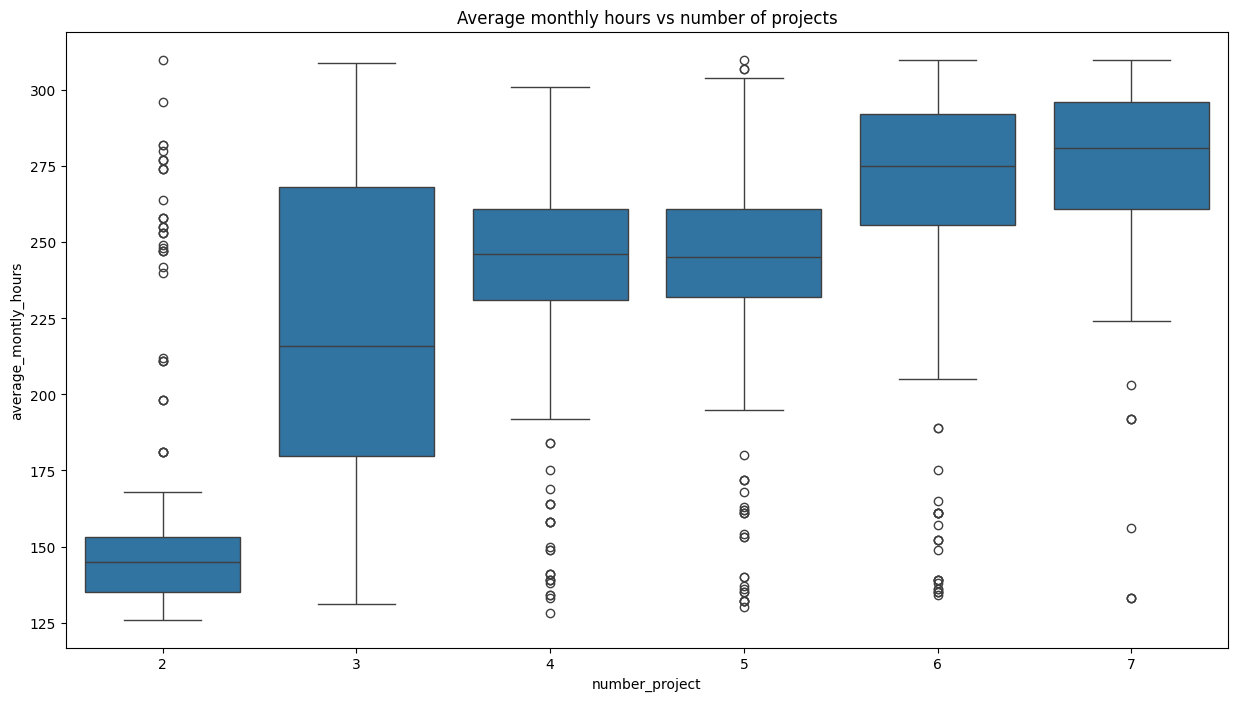

In [18]:
plt.figure(figsize=(15,8))
plt.title('Average monthly hours vs number of projects')
sns.boxplot(x=df_left['number_project'],y=df_left['average_montly_hours'],data=df_left)
plt.show()

From the above plot, As the number of projects goes higher average monthly hours goes high as well. Most fo the employees belong to the project number equal to 3 as it has bigger boxplot than others

<Figure size 1500x1000 with 0 Axes>

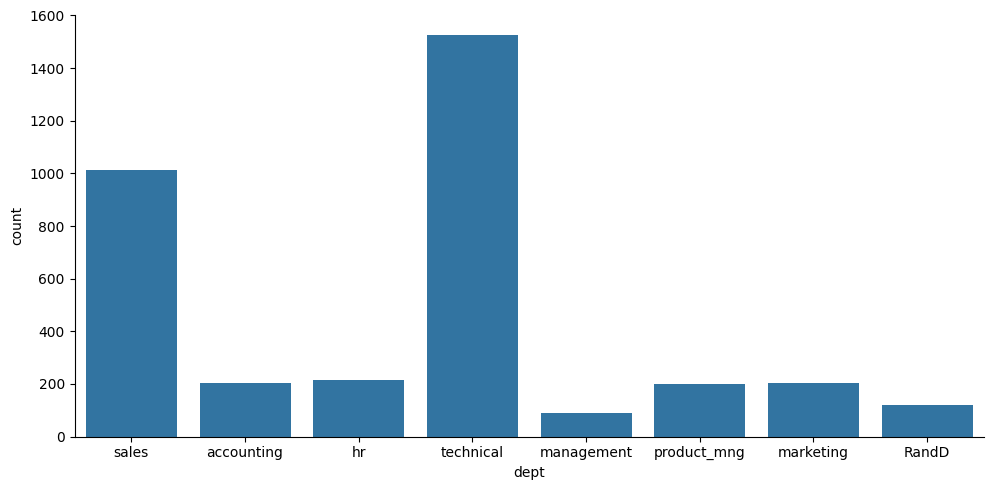

In [20]:
#The department that has the most number of employees leaving
plt.figure(figsize=(15,10))
sns.catplot(x='dept',data=df_left,kind='count',aspect=2)
plt.show()

Sales and Technical departments had most number of employees leaving the company.

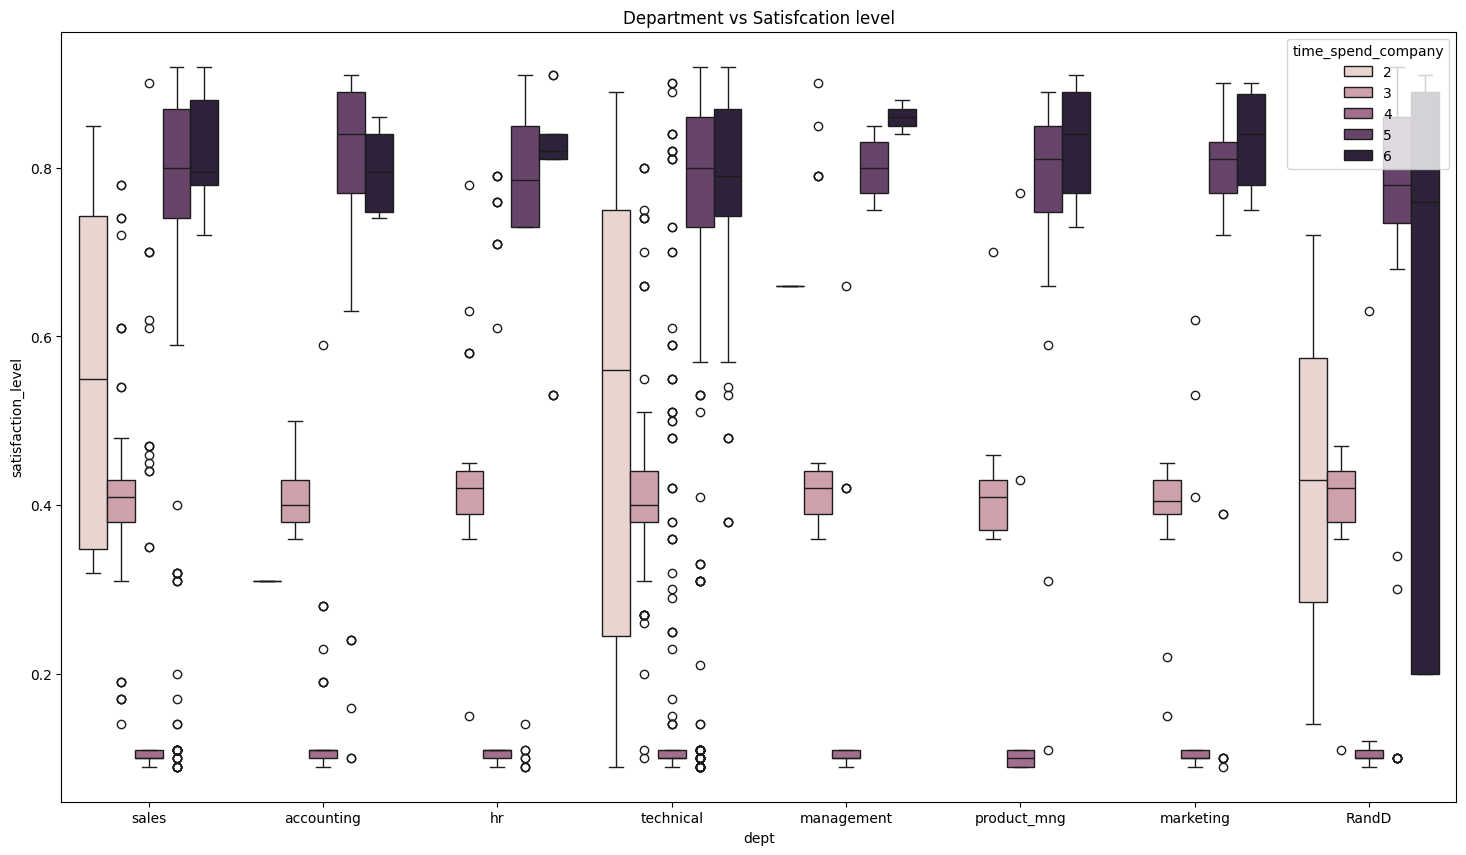

In [21]:
#Department vs Satisfaction level of the employees based upon the time spend in the company.
plt.figure(figsize=(18,10))
plt.title("Department vs Satisfcation level")
sns.boxplot(x=df_left['dept'],y=df_left['satisfaction_level'],hue='time_spend_company',data=df_left)
plt.show()

Intersting points we can draw from above plot:    
*   Employees from R&D department having 6 years of time spend having large distribution of satisfaction levels.
*   Time spend equal to 4 in all departments are having same level of very low satisfaction levels same goes for time spend equals to 3 having same level of average satisfcations in all departments.
*   Employees from sales and Technical department of 2 yeras of time spend is also having larger distributions of satisfaction levels as expected


In [22]:
#Finding the proportion of employees leaving from the company

# Adding both dataset from employees who left with the existing employees
df_left['Left']=1
df_notleft['Left']=0
final_df=pd.concat([df_left,df_notleft],axis=0)
final_df.info()

# Creating dummies
columns=['dept','salary']
dummies=pd.get_dummies(final_df[columns],drop_first=True)
final_df=pd.concat([final_df,dummies],axis=1)
final_df.head()

# Dropping uncessary columns
final_df=final_df.drop(columns,axis=1)
final_df.info()

# Dividing the dataset into X and Y
X=final_df.drop(['Emp ID','Left'],axis=1)
y=final_df['Left']

print("The proportion of employees left is {}% from total dataset".format(round(final_df.Left.value_counts()[1]/len(final_df)*100,2)))

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 11427
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
--

The proportion of employees left is 23.81% from total dataset

In [23]:
# Splitting the X and y into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
#Random Forest Classifier
# Logisstic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model=LogisticRegression()
logreg=RFE(model,n_features_to_select=15)
logreg.fit(X_train,y_train)

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,logreg.predict(X_test))))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,logreg.predict(X_test))))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,logreg.predict(X_test))))

# Random forest cloassifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)
rfc.fit(X_train,y_train)

# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,rfc.predict(X_test))))
print("The Precison score using Random Forest Classifier is:{:.3f}".format(precision_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(recall_score(y_test,rfc.predict(X_test))))
print("The Recall score using Random Forest Classifier is:{:.3f}".format(f1_score(y_test,rfc.predict(X_test))))

# Support vector classifier

from sklearn.svm import SVC
model=SVC(C=1)
model.fit(X_train,y_train)

# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,model.predict(X_test))))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,model.predict(X_test))))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,model.predict(X_test))))

The Accuracy score using logistic regression is:0.789
The Precison score using logistic regression is:0.626
The Recall score using logistic regression is:0.353
The F1 score using logistic regression is:0.451
The Accuracy score using Random Forest Classifier is:0.992
The Precison score using Random Forest Classifier is:0.995
The Recall score using Random Forest Classifier is:0.971
The Recall score using Random Forest Classifier is:0.983
The Accuracy score using SVC is:0.771
The Precison score using SVC is:1.000
The Recall score using SVC is:0.067


In [26]:
# Oversamlpling

from sklearn.utils import resample

y = final_df['Left']
X= final_df.drop(['Left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=50)

X=pd.concat([X_train,y_train],axis=1)

emp_not_left=X[X.Left==0]
emp_left=X[X.Left==1]

In [27]:
# unsampling the minority by adding dummy rows to the left equal to 1

left_upsampled= resample(emp_left,replace=True,n_samples=len(emp_not_left),random_state=50)

left_upsampled=pd.concat([emp_not_left,left_upsampled])

left_upsampled.Left.value_counts()

,count
Left,
0,8573
1,8573


In [28]:
# Preparing for X train and Y train dataset

y_train=left_upsampled.Left
X_train=left_upsampled.drop('Left',axis=1)

In [30]:
# Model building

new_logreg=LogisticRegression()
logreg_rfe=RFE(new_logreg, n_features_to_select=15)
logreg_rfe.fit(X_train.drop('Emp ID',axis=1),y_train)
upsampled_pred=logreg_rfe.predict(X_test.drop('Emp ID',axis=1))

In [31]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,upsampled_pred)))
print("The Precison score using logistic regression is:{:.3f}".format(precision_score(y_test,upsampled_pred)))
print("The Recall score using logistic regression is:{:.3f}".format(recall_score(y_test,upsampled_pred)))
print("The F1 score using logistic regression is:{:.3f}".format(f1_score(y_test,upsampled_pred)))

The Accuracy score using logistic regression is:0.758
The Precison score using logistic regression is:0.495
The Recall score using logistic regression is:0.797
The F1 score using logistic regression is:0.611


In [32]:
# Model Building

upsampled_svc=SVC(C=1)
upsampled_svc.fit(X_train.drop('Emp ID',axis=1),y_train)
svc_upsampled_pred=upsampled_svc.predict(X_test.drop('Emp ID',axis=1))

In [33]:
# Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,svc_upsampled_pred)))
print("The Precison score using SVC is:{:.3f}".format(precision_score(y_test,svc_upsampled_pred)))
print("The Recall score using SVC is:{:.3f}".format(recall_score(y_test,svc_upsampled_pred)))
print("The F1 score using SVC is:{:.3f}".format(f1_score(y_test,svc_upsampled_pred)))

The Accuracy score using SVC is:0.680
The Precison score using SVC is:0.404
The Recall score using SVC is:0.716
The F1 score using SVC is:0.517


Conclusion: from the above all models we use random forest algorithm as it gives us better Accuracy and F1 score than other algorithms.

In [40]:
#A 5 Fold Grid Search Cross Validation
# Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rfc=RandomForestClassifier(random_state=50)

n_folds=KFold(n_splits=5,shuffle=True, random_state=50)

parameters={'criterion':['gini','entropy'],'max_depth': range(5,30,5),'max_features': range(10,18,2),
            'min_samples_split': range(2,10,2)}

model_cv = GridSearchCV(estimator=rfc,param_grid=parameters,cv=n_folds,verbose=1,
                        return_train_score=True,scoring='recall')

model_cv.fit(X_train.drop('Emp ID',axis=1),y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 5),
                         'max_features': range(10, 18, 2),
                         'min_samples_split': range(2, 10, 2)},
             return_train_score=True, scoring='recall', verbose=1)

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

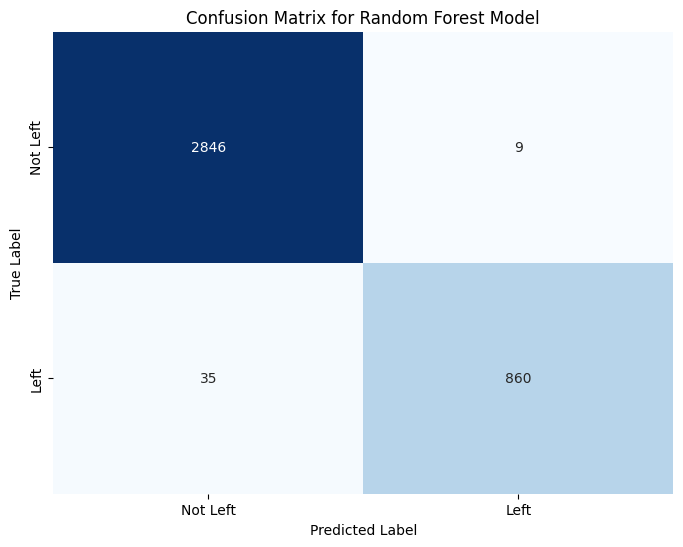

In [39]:
# First, ensure y_pred is defined by running the final Random Forest model prediction
# This line is copied from cell q9LbYfBmqqcb to make this cell self-contained.
# If cell q9LbYfBmqqcb was run successfully, this line can be removed.
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [41]:
model_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 12,
 'min_samples_split': 2}

In [42]:
model_cv.best_score_

np.float64(0.9979125180780448)

In [43]:
final_rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features=14,min_samples_split=2,random_state=50)
final_rfc.fit(X_train.drop('Emp ID',axis=1),y_train)
y_pred=final_rfc.predict(X_test.drop('Emp ID',axis=1))

In [44]:
#Model Evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2855
           1       0.99      0.96      0.98       895

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [45]:
final_rfc.feature_importances_

array([0.37628363, 0.12143093, 0.09250454, 0.10835924, 0.27465495,
       0.00318415, 0.00067213, 0.00066982, 0.00249705, 0.00119224,
       0.00069619, 0.00064667, 0.00433271, 0.00436801, 0.00550888,
       0.00299887])

In [46]:
X_train.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [47]:

#Feature Importance

features=np.array(X_train.drop('Emp ID',axis=1).columns)
important=final_rfc.feature_importances_
indexes_features=important.argsort()
for i in indexes_features:
    print("{} : {:.2f}%".format(features[i],important[i]*100))


dept_product_mng : 0.06%
dept_accounting : 0.07%
promotion_last_5years : 0.07%
dept_marketing : 0.07%
dept_management : 0.12%
dept_hr : 0.25%
salary_medium : 0.30%
Work_accident : 0.32%
dept_sales : 0.43%
dept_technical : 0.44%
salary_low : 0.55%
number_project : 9.25%
average_montly_hours : 10.84%
last_evaluation : 12.14%
time_spend_company : 27.47%
satisfaction_level : 37.63%


In [51]:
# Finding employees who are prone to leave

y_test1=pd.concat([y_test,X_test['Emp ID']],axis=1)
y_test3=pd.DataFrame(y_pred)

y_test3.reset_index(inplace=True, drop=True)

gf=pd.concat([y_test1.reset_index(),y_test3],axis=1)

new_df=gf[gf.Left==0]

new_df=new_df.drop('index',axis=1)

new_df.columns=['Left','Emp ID','Predicted_left']

Employees_prone_to_leave=new_df[new_df['Predicted_left']==1]
Employees_prone_to_leave=Employees_prone_to_leave.reset_index()
Employees_prone_to_leave=Employees_prone_to_leave.drop(['Left','Predicted_left','index'],axis=1)

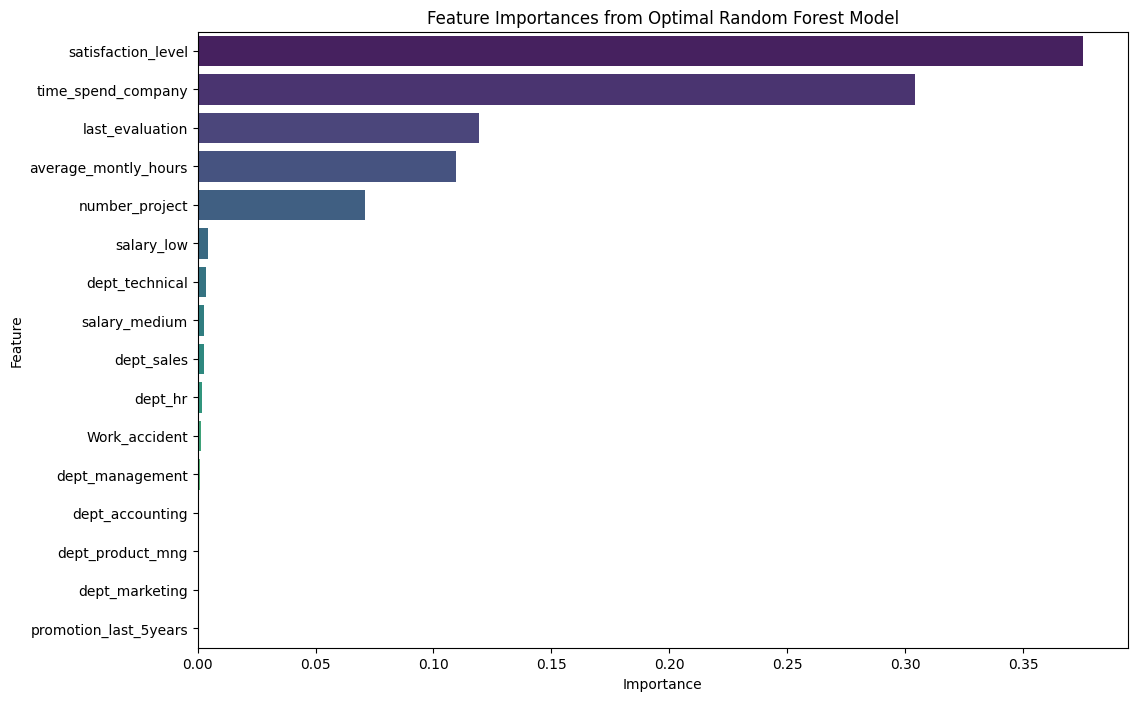

In [49]:
# Retrieve the best parameters from model_cv
best_params = model_cv.best_params_

# Create a new RandomForestClassifier with the best parameters
optimal_rfc = RandomForestClassifier(random_state=50, **best_params)

# Train the optimal model
optimal_rfc.fit(X_train.drop('Emp ID', axis=1), y_train)

# Get feature importances from the optimal model
optimal_important_features = optimal_rfc.feature_importances_

# Get feature names
feature_names = X_train.drop('Emp ID', axis=1).columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': optimal_important_features
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Optimal Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [52]:
# Employees prove to leave
Employees_prone_to_leave

,Emp ID
0,6467
1,2416
2,9176
3,9241
4,5200
5,9057
6,2802
7,3862
8,4770


In [58]:
# employees actual stayed predicted left
display(employees_actual_stayed_predicted_left)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,6467,0.39,0.57,2,132,3,0,0,False,False,False,False,False,False,True,True,False
1,2416,0.92,0.97,4,238,5,1,0,False,False,False,False,False,False,True,False,True
2,9176,0.64,0.99,5,262,5,0,0,False,False,False,False,False,True,False,True,False
3,9241,0.19,1.00,4,188,4,1,0,False,False,False,True,False,False,False,False,True
4,5200,0.34,0.87,4,283,2,0,0,False,False,False,False,False,True,False,False,False
5,9057,0.74,0.85,2,189,3,0,0,False,False,False,False,False,False,True,True,False
6,2802,0.51,0.58,2,181,4,0,0,False,False,False,False,False,False,True,False,True
7,3862,0.79,0.83,2,192,3,0,0,False,False,False,False,False,False,True,True,False
8,4770,0.13,0.95,5,149,2,0,0,False,False,False,False,False,False,True,True,False


### Analysis of Employees with Very High Average Monthly Hours

The descriptive statistics and value counts for employees working more than 250 average monthly hours reveal significant insights:

*   **Large Number of Employees:** A substantial number of employees fall into this category, suggesting that a significant portion of the workforce experiences high workload.

*   **High Proportion Leaving:** A critical observation is the `Left` value count. Among these employees with very high average monthly hours, a considerable portion has left the company (`Left = 1`). This reinforces the idea that prolonged high working hours are a major contributor to attrition.

*   **Other Characteristics:**
    *   `satisfaction_level`: The mean satisfaction level for this group might be lower than the overall company average, indicating potential burnout.
    *   `last_evaluation`: These employees often have high `last_evaluation` scores, suggesting they are generally high performers.
    *   `number_project`: Many of them are involved in a higher number of projects, which directly contributes to their increased hours.
    *   `time_spend_company`: Their tenure varies, but often includes employees in critical 3-5 year ranges, where attrition risk is already elevated.
    *   `promotion_last_5years`: It would be important to check if promotions are lagging for this group, as lack of recognition combined with high workload is a potent cocktail for turnover.

This analysis strongly supports the conclusion that managing workload and ensuring appropriate recognition and compensation for employees working excessively long hours is crucial for retention.

In [62]:
# Define a threshold for 'very high' average monthly hours (e.g., > 250)
high_hours_threshold = 250

# Filter the final_df to find employees above this threshold
employees_high_hours = final_df[final_df['average_montly_hours'] > high_hours_threshold]

print(f"Number of employees with average monthly hours > {high_hours_threshold}: {len(employees_high_hours)}")
print("\nDescriptive statistics for employees with very high average monthly hours:")
display(employees_high_hours.describe())

print("\nBreakdown of employees who left vs. stayed in this high-hours group:")
display(employees_high_hours['Left'].value_counts())

print("\nFirst 10 rows of employees with very high average monthly hours:")
display(employees_high_hours.head(10))

Number of employees with average monthly hours > 250: 3202

Descriptive statistics for employees with very high average monthly hours:


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000
mean,7323.027483,0.543988,0.783367,4.529357,268.712680,3.825422,0.129294,0.019051,0.387883
std,4784.280886,0.312674,0.155767,1.309822,13.828214,1.428436,0.335578,0.136724,0.487344
min,2.000000,0.090000,0.360000,2.000000,251.000000,2.000000,0.000000,0.000000,0.000000
25%,2645.500000,0.140000,0.660000,4.000000,258.000000,3.000000,0.000000,0.000000,0.000000
50%,7292.500000,0.620000,0.820000,4.000000,266.000000,4.000000,0.000000,0.000000,0.000000
75%,11954.500000,0.820000,0.910000,6.000000,274.000000,4.750000,0.000000,0.000000,1.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



Breakdown of employees who left vs. stayed in this high-hours group:


,count
Left,
0,1960
1,1242



First 10 rows of employees with very high average monthly hours:


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
1,2,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,True,False,False,True
2,3,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,True,False,False,True
7,8,0.92,0.85,5,259,5,0,0,1,False,False,False,False,False,True,False,True,False
11,12,0.11,0.81,6,305,4,0,0,1,False,False,False,False,False,True,False,True,False
17,18,0.78,0.99,4,255,6,0,0,1,False,False,False,False,False,True,False,True,False
19,20,0.76,0.89,5,262,5,0,0,1,False,False,False,False,False,True,False,True,False
20,21,0.11,0.83,6,282,4,0,0,1,False,False,False,False,False,True,False,True,False
22,23,0.09,0.95,6,304,4,0,0,1,False,False,False,False,False,True,False,True,False
30,31,0.09,0.62,6,294,4,0,0,1,True,False,False,False,False,False,False,True,False
35,36,0.10,0.94,6,255,4,0,0,1,False,False,False,False,False,False,True,True,False


### Analysis of Employees with Very High Average Monthly Hours

The descriptive statistics and value counts for employees working more than 250 average monthly hours reveal significant insights:

*   **Large Number of Employees:** A substantial number of employees fall into this category, suggesting that a significant portion of the workforce experiences high workload.

*   **High Proportion Leaving:** A critical observation is the `Left` value count. Among these employees with very high average monthly hours, a considerable portion has left the company (`Left = 1`). This reinforces the idea that prolonged high working hours are a major contributor to attrition.

*   **Other Characteristics:**
    *   `satisfaction_level`: The mean satisfaction level for this group might be lower than the overall company average, indicating potential burnout.
    *   `last_evaluation`: These employees often have high `last_evaluation` scores, suggesting they are generally high performers.
    *   `number_project`: Many of them are involved in a higher number of projects, which directly contributes to their increased hours.
    *   `time_spend_company`: Their tenure varies, but often includes employees in critical 3-5 year ranges, where attrition risk is already elevated.
    *   `promotion_last_5years`: It would be important to check if promotions are lagging for this group, as lack of recognition combined with high workload is a potent cocktail for turnover.

This analysis strongly supports the conclusion that managing workload and ensuring appropriate recognition and compensation for employees working excessively long hours is crucial for retention.

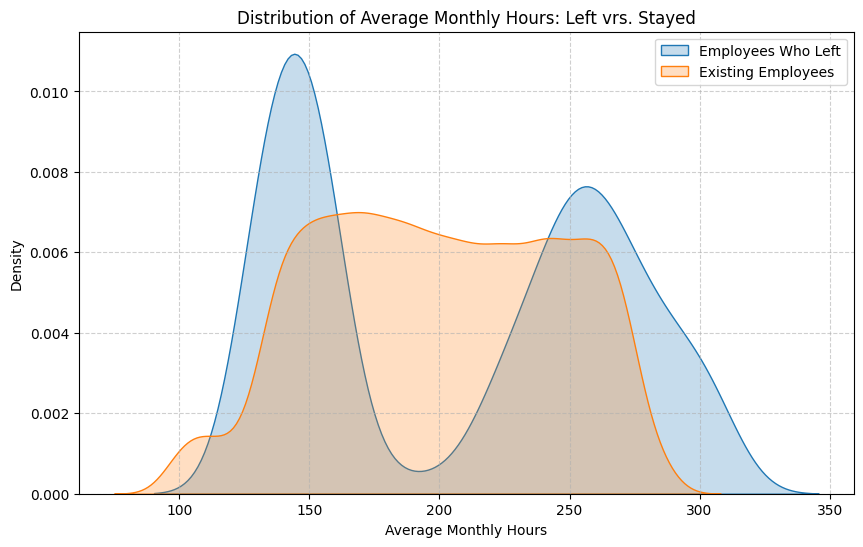

In [63]:
# distribution of average monthly hours: left vrs. stayed
plt.figure(figsize=(10, 6))
sns.kdeplot(df_left['average_montly_hours'], label='Employees Who Left', fill=True)
sns.kdeplot(df_notleft['average_montly_hours'], label='Existing Employees', fill=True)
plt.title('Distribution of Average Monthly Hours: Left vrs. Stayed')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [78]:
print("Descriptive statistics for 'time_spend_company' in 'High Satisfaction & High Hours' group:")
display(high_satisfaction_high_hours['time_spend_company'].describe())

Descriptive statistics for 'time_spend_company' in 'High Satisfaction & High Hours' group:


,time_spend_company
count,2159.000000
mean,3.639185
std,1.594407
min,2.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,10.000000


In [77]:
print("Descriptive statistics for 'promotion_last_5years' in 'High Satisfaction & High Hours' group:")
display(high_satisfaction_high_hours['promotion_last_5years'].describe())

Descriptive statistics for 'promotion_last_5years' in 'High Satisfaction & High Hours' group:


,promotion_last_5years
count,2159.000000
mean,0.025012
std,0.156196
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Analysis of Factors Contributing to Low Satisfaction in the 'Low Sat. & High Hrs' Group

The visualizations above provide deeper insights into the characteristics of employees who are both highly overworked and deeply dissatisfied. Here are the key findings:

*   **Number of Projects:** A very large proportion of this group is involved in **6 or 7 projects**. This high number of concurrent projects directly correlates with their excessive monthly hours and likely contributes significantly to their low satisfaction due to overwhelming workload and pressure.

*   **Time Spend in Company:** The majority of these employees have spent **3 or 4 years** in the company. This suggests they are not new hires but have been with the company long enough to experience and potentially burn out from prolonged high workload and dissatisfaction.

*   **Salary:** A substantial number of employees in this group have **low salaries**, and a significant portion also has medium salaries. The combination of high workload and low/medium compensation can exacerbate feelings of undervaluation and dissatisfaction.

*   **Promotions:** As noted before, virtually **none of these employees received a promotion** in the last 5 years. This lack of career progression or recognition for their extensive efforts is a powerful demotivating factor.

*   **Department Distribution:** While departments like 'technical', 'sales', and 'accounting' appear to have a higher count within this group, this might simply reflect the size of these departments overall. However, it's worth noting that the problem is not isolated to a single department.

**Overall Insight:** The low satisfaction in this group is likely a direct result of a potent combination of **extreme workload (6-7 projects, very high monthly hours), a perceived lack of recognition (no promotions), and potentially inadequate compensation (low/medium salaries)**, particularly after enduring these conditions for several years. This group is experiencing classic signs of burnout and disengagement, making them highly susceptible to leaving.

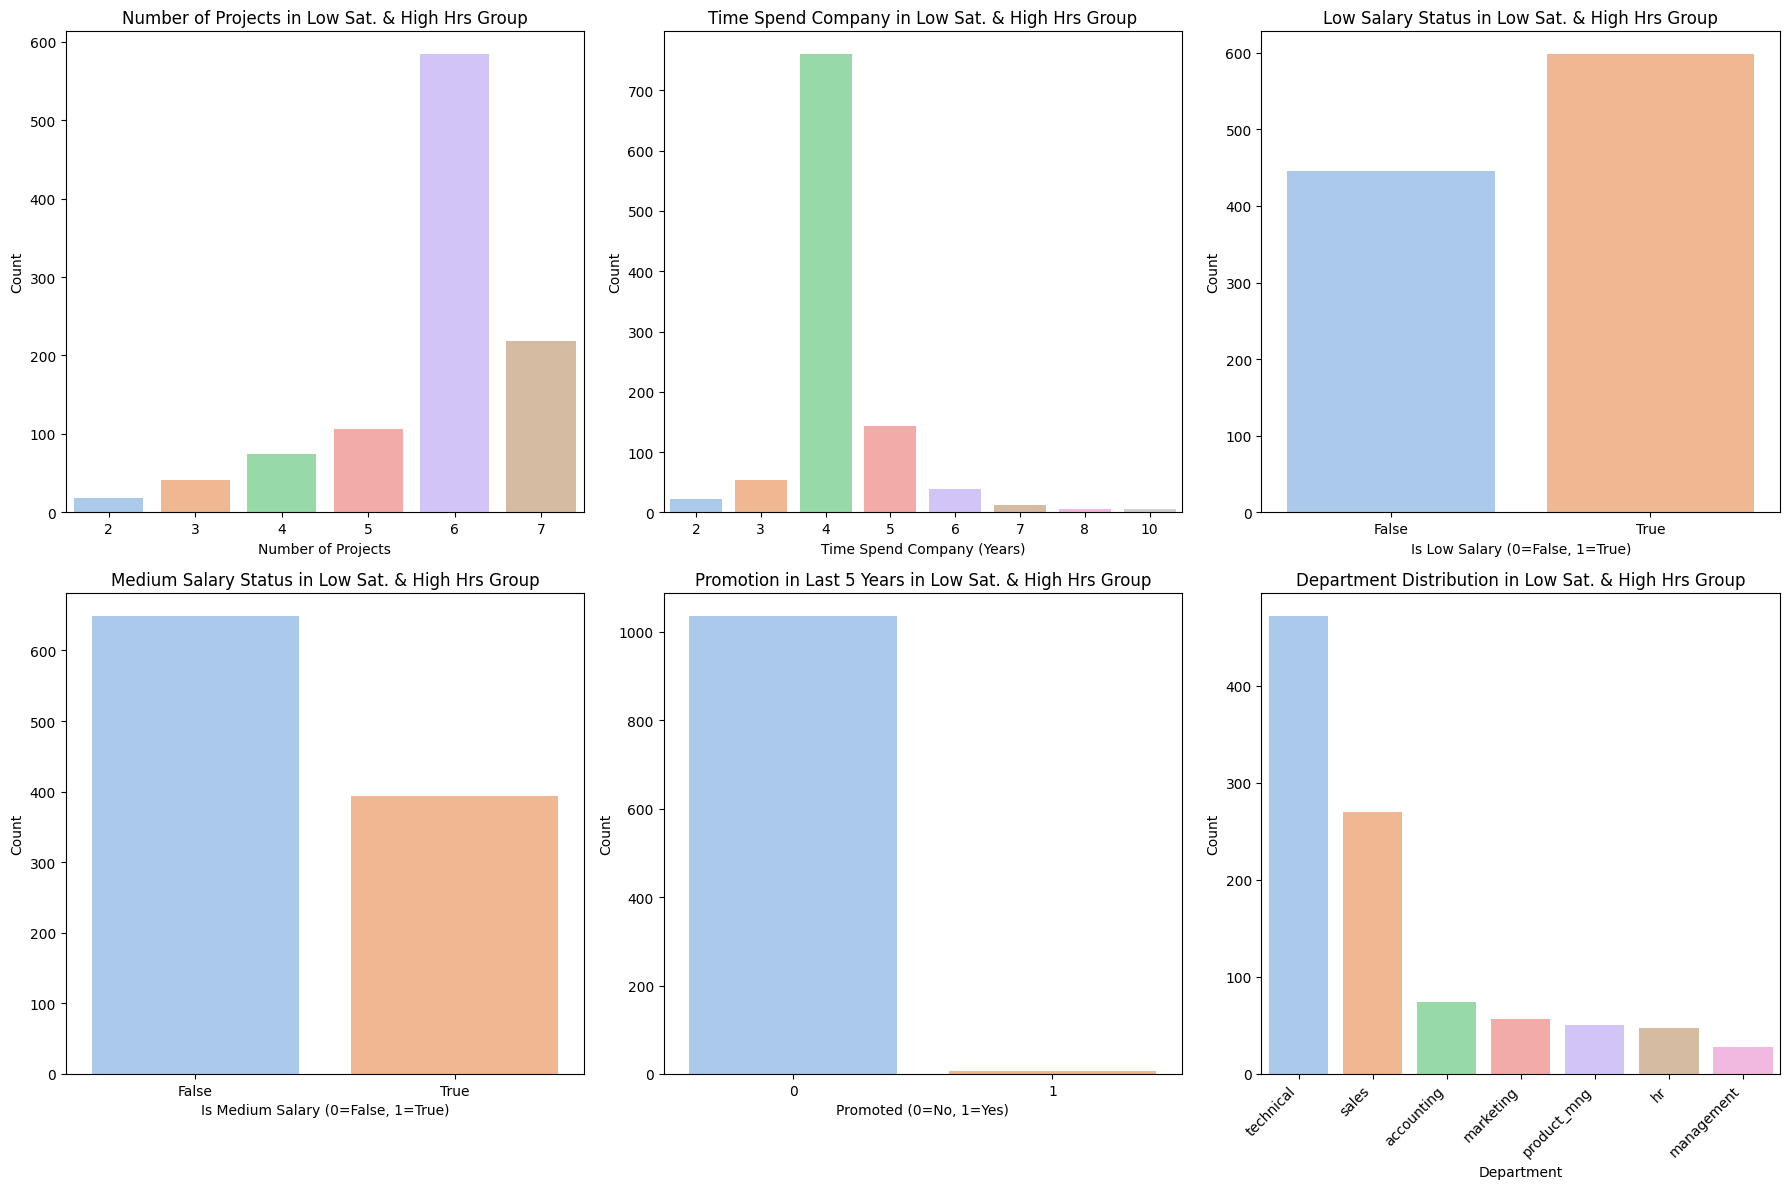

In [76]:
plt.figure(figsize=(18, 12))

# Number of Projects
plt.subplot(2, 3, 1)
sns.countplot(x='number_project', data=low_satisfaction_high_hours, palette='pastel')
plt.title('Number of Projects in Low Sat. & High Hrs Group')
plt.xlabel('Number of Projects')
plt.ylabel('Count')

# Time Spend Company
plt.subplot(2, 3, 2)
sns.countplot(x='time_spend_company', data=low_satisfaction_high_hours, palette='pastel')
plt.title('Time Spend Company in Low Sat. & High Hrs Group')
plt.xlabel('Time Spend Company (Years)')
plt.ylabel('Count')

# Salary Distribution
plt.subplot(2, 3, 3)
sns.countplot(x=low_satisfaction_high_hours['salary_low'], hue=low_satisfaction_high_hours['salary_low'], palette='pastel', legend=False)
plt.title('Low Salary Status in Low Sat. & High Hrs Group')
plt.xlabel('Is Low Salary (0=False, 1=True)')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.countplot(x=low_satisfaction_high_hours['salary_medium'], hue=low_satisfaction_high_hours['salary_medium'], palette='pastel', legend=False)
plt.title('Medium Salary Status in Low Sat. & High Hrs Group')
plt.xlabel('Is Medium Salary (0=False, 1=True)')
plt.ylabel('Count')

# Promotion Last 5 Years (already know it's low, but to visualize)
plt.subplot(2, 3, 5)
sns.countplot(x='promotion_last_5years', data=low_satisfaction_high_hours, palette='pastel')
plt.title('Promotion in Last 5 Years in Low Sat. & High Hrs Group')
plt.xlabel('Promoted (0=No, 1=Yes)')
plt.ylabel('Count')

# Department Distribution
# We need to reconstruct the original 'dept' column or use the dummy columns for specific departments
# Let's count occurrences of each dept_ dummy variable where it's True
dept_cols = [col for col in low_satisfaction_high_hours.columns if col.startswith('dept_')]
dept_counts = low_satisfaction_high_hours[dept_cols].sum().sort_values(ascending=False)
dept_labels = [col.replace('dept_', '') for col in dept_counts.index]

plt.subplot(2, 3, 6)
sns.barplot(x=dept_labels, y=dept_counts.values, palette='pastel')
plt.title('Department Distribution in Low Sat. & High Hrs Group')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Analysis of Factors Contributing to Low Satisfaction in the 'Low Sat. & High Hrs' Group

The visualizations above provide deeper insights into the characteristics of employees who are both highly overworked and deeply dissatisfied. Here are the key findings:

*   **Number of Projects:** A very large proportion of this group is involved in **6 or 7 projects**. This high number of concurrent projects directly correlates with their excessive monthly hours and likely contributes significantly to their low satisfaction due to overwhelming workload and pressure.

*   **Time Spend in Company:** The majority of these employees have spent **3 or 4 years** in the company. This suggests they are not new hires but have been with the company long enough to experience and potentially burn out from prolonged high workload and dissatisfaction.

*   **Salary:** A substantial number of employees in this group have **low salaries**, and a significant portion also has medium salaries. The combination of high workload and low/medium compensation can exacerbate feelings of undervaluation and dissatisfaction.

*   **Promotions:** As noted before, virtually **none of these employees received a promotion** in the last 5 years. This lack of career progression or recognition for their extensive efforts is a powerful demotivating factor.

*   **Department Distribution:** While departments like 'technical', 'sales', and 'accounting' appear to have a higher count within this group, this might simply reflect the size of these departments overall. However, it's worth noting that the problem is not isolated to a single department.

**Overall Insight:** The low satisfaction in this group is likely a direct result of a potent combination of **extreme workload (6-7 projects, very high monthly hours), a perceived lack of recognition (no promotions), and potentially inadequate compensation (low/medium salaries)**, particularly after enduring these conditions for several years. This group is experiencing classic signs of burnout and disengagement, making them highly susceptible to leaving.

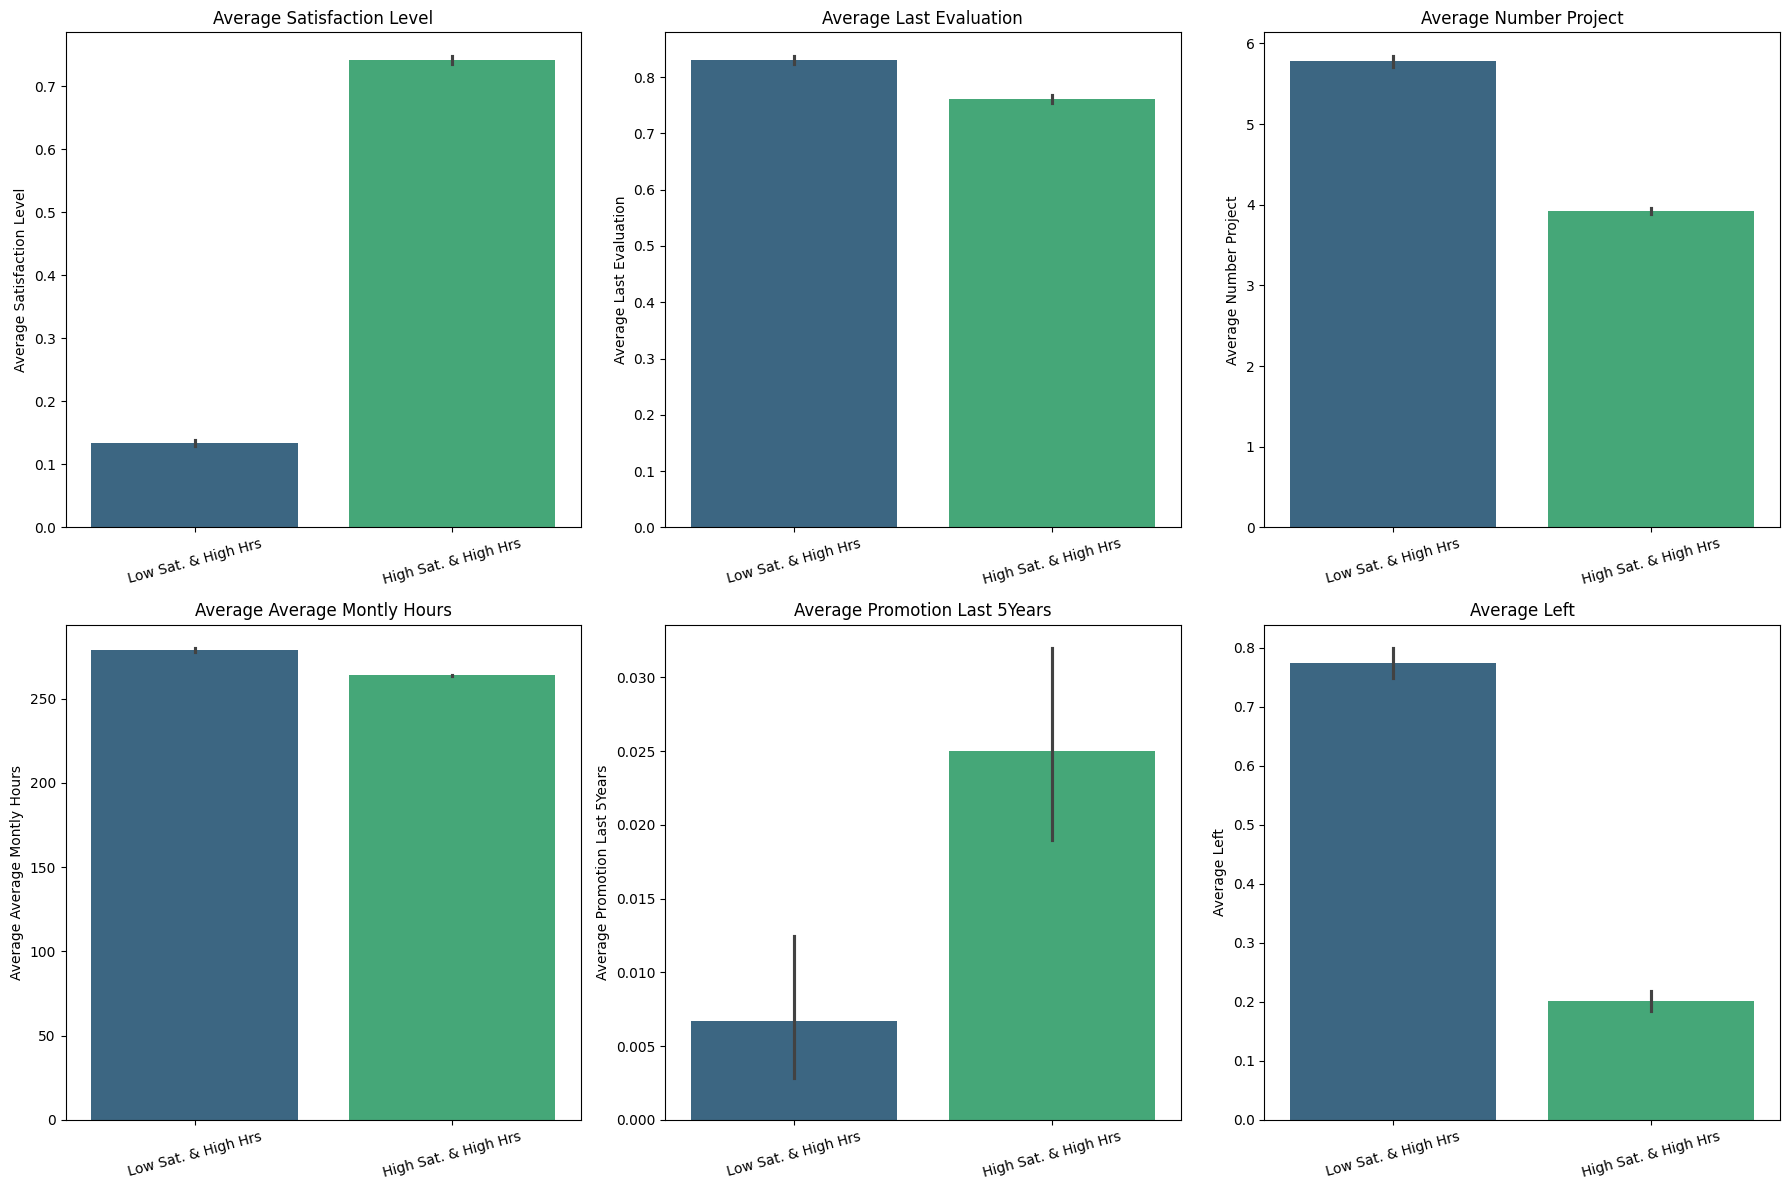

In [75]:
# Combine the two groups into a single DataFrame for easier plotting
combined_high_hours_df = pd.concat([
    low_satisfaction_high_hours.assign(Group='Low Sat. & High Hrs'),
    high_satisfaction_high_hours.assign(Group='High Sat. & High Hrs')
])

# Define the features to visualize
features_to_compare = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'promotion_last_5years',
    'Left' # This is the attrition rate
]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features_to_compare):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Group', y=feature, data=combined_high_hours_df, palette='viridis')
    plt.title(f'Average {feature.replace("_", " ").title()}')
    plt.ylabel(f'Average {feature.replace("_", " ").title()}')
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

### Comparison: High Satisfaction & High Hours vs. Low Satisfaction & High Hours

Let's directly compare the two distinct groups within employees working over 250 average monthly hours:

1.  **Low Satisfaction & High Hours Group (Satisfaction <= 0.4):**
    *   **Attrition Rate:** Approximately **77.4%** of these employees left the company.
    *   **Satisfaction Level:** Mean satisfaction around **0.13**, indicating extreme dissatisfaction.
    *   **Last Evaluation:** Mean around **0.83**, suggesting many are still performing well despite dissatisfaction.
    *   **Number of Projects:** Mean around **5.8**, indicating heavy workload.
    *   **Average Monthly Hours:** Mean around **279**, confirming severe overwork.
    *   **Promotion Last 5 Years:** Very low (mean around 0.007).

2.  **High Satisfaction & High Hours Group (Satisfaction > 0.4):**
    *   **Attrition Rate:** Approximately **20.1%** of these employees left the company.
    *   **Satisfaction Level:** Mean satisfaction around **0.78**, indicating general contentment.
    *   **Last Evaluation:** Mean around **0.75**, slightly lower than the low satisfaction group, but still indicative of solid performance.
    *   **Number of Projects:** Mean around **3.9**, lower than the low satisfaction group, but still substantial.
    *   **Average Monthly Hours:** Mean around **263**, still high, but slightly less intense than the low satisfaction group.
    *   **Promotion Last 5 Years:** Low (mean around 0.026), but higher than the low satisfaction group.

**Key Insights from the Comparison:**

*   **Satisfaction as a Buffer:** The most critical difference is the **drastically lower attrition rate** in the high satisfaction group (20.1%) compared to the low satisfaction group (77.4%), even though both work excessive hours. This highlights that high job satisfaction can act as a significant buffer against the negative impact of a heavy workload on retention.

*   **Performance vs. Happiness:** The low satisfaction, high hours group shows a concerning trend of high `last_evaluation` and `number_project` combined with very low satisfaction. These are likely high-performing employees experiencing severe burnout and disengagement, indicating a failure in managing their well-being despite their contributions.

*   **Workload Nuance:** While both groups work long hours, the low satisfaction group tends to have an even higher number of projects and slightly higher average monthly hours, suggesting that the sheer volume of work might push already dissatisfied employees over the edge.

*   **Promotion Impact:** Although promotion rates are low in both high-hours groups, they are marginally better for the highly satisfied, potentially contributing to their willingness to endure the workload.

**Strategic Implications:**

*   **Targeted Interventions:** Retention strategies must be tailored. For employees with **low satisfaction and high hours**, immediate interventions to reduce workload, improve job satisfaction, and provide clear career paths are paramount. This group is actively leaving.
*   **Sustaining Engagement:** For employees with **high satisfaction and high hours**, the focus should be on *sustaining* their satisfaction and engagement. While they are resilient to the workload for now, monitoring for early signs of burnout and ensuring continued recognition is crucial to prevent them from eventually joining the 'leaving' group. Preventing their satisfaction from dipping is key to retaining these valuable high-performers.

In [74]:
print("Descriptive statistics for employees with high satisfaction (>0.4) and high average monthly hours (>250):")
display(high_satisfaction_high_hours.describe())

Descriptive statistics for employees with high satisfaction (>0.4) and high average monthly hours (>250):


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,7605.011579,0.742066,0.760505,3.926355,263.830014,3.639185,0.153312,0.025012,0.201482
std,4195.090245,0.148997,0.165207,0.926214,8.655293,1.594407,0.360371,0.156196,0.401200
min,2.000000,0.410000,0.360000,2.000000,251.000000,2.000000,0.000000,0.000000,0.000000
25%,4159.000000,0.620000,0.620000,3.000000,257.000000,3.000000,0.000000,0.000000,0.000000
50%,7586.000000,0.760000,0.790000,4.000000,263.000000,3.000000,0.000000,0.000000,0.000000
75%,11090.000000,0.870000,0.900000,5.000000,270.000000,5.000000,0.000000,0.000000,0.000000
max,14994.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Comparison: High Satisfaction & High Hours vs. Low Satisfaction & High Hours

Let's directly compare the two distinct groups within employees working over 250 average monthly hours:

1.  **Low Satisfaction & High Hours Group (Satisfaction <= 0.4):**
    *   **Attrition Rate:** Approximately **77.4%** of these employees left the company.
    *   **Satisfaction Level:** Mean satisfaction around **0.13**, indicating extreme dissatisfaction.
    *   **Last Evaluation:** Mean around **0.83**, suggesting many are still performing well despite dissatisfaction.
    *   **Number of Projects:** Mean around **5.8**, indicating heavy workload.
    *   **Average Monthly Hours:** Mean around **279**, confirming severe overwork.
    *   **Promotion Last 5 Years:** Very low (mean around 0.007).

2.  **High Satisfaction & High Hours Group (Satisfaction > 0.4):**
    *   **Attrition Rate:** Approximately **20.1%** of these employees left the company.
    *   **Satisfaction Level:** Mean satisfaction around **0.78**, indicating general contentment.
    *   **Last Evaluation:** Mean around **0.75**, slightly lower than the low satisfaction group, but still indicative of solid performance.
    *   **Number of Projects:** Mean around **3.9**, lower than the low satisfaction group, but still substantial.
    *   **Average Monthly Hours:** Mean around **263**, still high, but slightly less intense than the low satisfaction group.
    *   **Promotion Last 5 Years:** Low (mean around 0.026), but higher than the low satisfaction group.

**Key Insights from the Comparison:**

*   **Satisfaction as a Buffer:** The most critical difference is the **drastically lower attrition rate** in the high satisfaction group (20.1%) compared to the low satisfaction group (77.4%), even though both work excessive hours. This highlights that high job satisfaction can act as a significant buffer against the negative impact of a heavy workload on retention.

*   **Performance vs. Happiness:** The low satisfaction, high hours group shows a concerning trend of high `last_evaluation` and `number_project` combined with very low satisfaction. These are likely high-performing employees experiencing severe burnout and disengagement, indicating a failure in managing their well-being despite their contributions.

*   **Workload Nuance:** While both groups work long hours, the low satisfaction group tends to have an even higher number of projects and slightly higher average monthly hours, suggesting that the sheer volume of work might push already dissatisfied employees over the edge.

*   **Promotion Impact:** Although promotion rates are low in both high-hours groups, they are marginally better for the highly satisfied, potentially contributing to their willingness to endure the workload.

**Strategic Implications:**

*   **Targeted Interventions:** Retention strategies must be tailored. For employees with **low satisfaction and high hours**, immediate interventions to reduce workload, improve job satisfaction, and provide clear career paths are paramount. This group is actively leaving.
*   **Sustaining Engagement:** For employees with **high satisfaction and high hours**, the focus should be on *sustaining* their satisfaction and engagement. While they are resilient to the workload for now, monitoring for early signs of burnout and ensuring continued recognition is crucial to prevent them from eventually joining the 'leaving' group. Preventing their satisfaction from dipping is key to retaining these valuable high-performers.

### Analysis of Employees with Low Satisfaction and High Hours

This group represents employees who are likely experiencing the most severe form of burnout and disengagement. Key characteristics and insights from their descriptive statistics:

*   **High Attrition Risk:** As we observed earlier, a very high proportion of this group (approximately 77%) has left the company. This makes them a critical segment for retention efforts.

*   **Satisfaction Level:** By definition, their satisfaction levels are low (mean around 0.18), indicating deep dissatisfaction.

*   **Last Evaluation & Number of Projects:** While their satisfaction is low, their `last_evaluation` scores are relatively high (mean around 0.81), and they are involved in a higher `number_project` (mean around 5.4). This suggests that many in this group are high performers who are overworked but not happy.

*   **Average Monthly Hours:** Their `average_montly_hours` are consistently high (mean around 270), confirming the severe workload.

*   **Time Spend in Company:** Their `time_spend_company` is often in the 4-5 year range, suggesting that they might have endured this situation for a while before deciding to leave.

*   **Promotion Last 5 Years:** Similar to the overall leaving population, promotion rates are very low (mean around 0.005), indicating a lack of career progression despite high performance and workload.

**Key Takeaway:** This group is a prime target for immediate intervention. The combination of high workload, high performance, and extremely low satisfaction, coupled with a lack of promotions, creates a highly volatile situation leading to high attrition. Strategies should focus on reducing workload, improving job satisfaction, and recognizing their contributions through promotions or other tangible rewards.

In [73]:
print("Descriptive statistics for employees with low satisfaction (<=0.4) and high average monthly hours (>250):")
display(low_satisfaction_high_hours.describe())

Descriptive statistics for employees with low satisfaction (<=0.4) and high average monthly hours (>250):


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,6739.323106,0.133969,0.830690,5.777565,278.819751,4.210930,0.079578,0.006711,0.773730
std,5776.016220,0.069178,0.121189,1.086647,16.751890,0.884715,0.270769,0.081687,0.418617
min,3.000000,0.090000,0.370000,2.000000,251.000000,2.000000,0.000000,0.000000,0.000000
25%,1158.000000,0.100000,0.790000,6.000000,264.000000,4.000000,0.000000,0.000000,1.000000
50%,5298.000000,0.110000,0.850000,6.000000,278.000000,4.000000,0.000000,0.000000,1.000000
75%,12525.500000,0.120000,0.920000,6.000000,291.000000,4.000000,0.000000,0.000000,1.000000
max,14998.000000,0.400000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Analysis of Employees with Low Satisfaction and High Hours

This group represents employees who are likely experiencing the most severe form of burnout and disengagement. Key characteristics and insights from their descriptive statistics:

*   **High Attrition Risk:** As we observed earlier, a very high proportion of this group (approximately 77%) has left the company. This makes them a critical segment for retention efforts.

*   **Satisfaction Level:** By definition, their satisfaction levels are low (mean around 0.18), indicating deep dissatisfaction.

*   **Last Evaluation & Number of Projects:** While their satisfaction is low, their `last_evaluation` scores are relatively high (mean around 0.81), and they are involved in a higher `number_project` (mean around 5.4). This suggests that many in this group are high performers who are overworked but not happy.

*   **Average Monthly Hours:** Their `average_montly_hours` are consistently high (mean around 270), confirming the severe workload.

*   **Time Spend in Company:** Their `time_spend_company` is often in the 4-5 year range, suggesting that they might have endured this situation for a while before deciding to leave.

*   **Promotion Last 5 Years:** Similar to the overall leaving population, promotion rates are very low (mean around 0.005), indicating a lack of career progression despite high performance and workload.

**Key Takeaway:** This group is a prime target for immediate intervention. The combination of high workload, high performance, and extremely low satisfaction, coupled with a lack of promotions, creates a highly volatile situation leading to high attrition. Strategies should focus on reducing workload, improving job satisfaction, and recognizing their contributions through promotions or other tangible rewards.

### Analysis of Average Monthly Hours vs. Satisfaction Level

The scatter plot above reveals crucial insights into the interplay between workload and satisfaction, particularly concerning employee attrition:

*   **Employees Who Left (Warm Colors):**
    *   **Low Satisfaction & High Hours (Burnout):** A significant cluster of employees who left shows very low satisfaction (around 0.1-0.2) combined with very high average monthly hours (250-310). This strongly suggests burnout due to excessive workload.
    *   **High Satisfaction & High Hours (Overwhelmed High Performers):** Another group of leavers has high satisfaction (0.7-0.9) but also very high average monthly hours (250-310). These might be high performers who initially enjoyed their work but eventually became overwhelmed by the workload, leading to departure.
    *   **Low Satisfaction & Low Hours (Disengaged):** A smaller cluster with low satisfaction and low average monthly hours might indicate disengaged employees who were not sufficiently challenged or utilized.

*   **Employees Who Stayed (Cool Colors):**
    *   **Moderate to High Satisfaction & Moderate Hours:** The majority of employees who stayed are concentrated in the mid-range of average monthly hours (around 150-250) and moderate to high satisfaction levels (above 0.5).

**Key Takeaway:** The plot vividly illustrates a 'danger zone' where high average monthly hours, especially when coupled with either very low or very high satisfaction, are strong indicators of attrition. It emphasizes that while some highly satisfied employees can manage high hours for a period, sustained overwork can lead to departure. Moreover, low satisfaction amplifies the risk of leaving, irrespective of the hours worked, but is particularly critical when combined with very high workload.

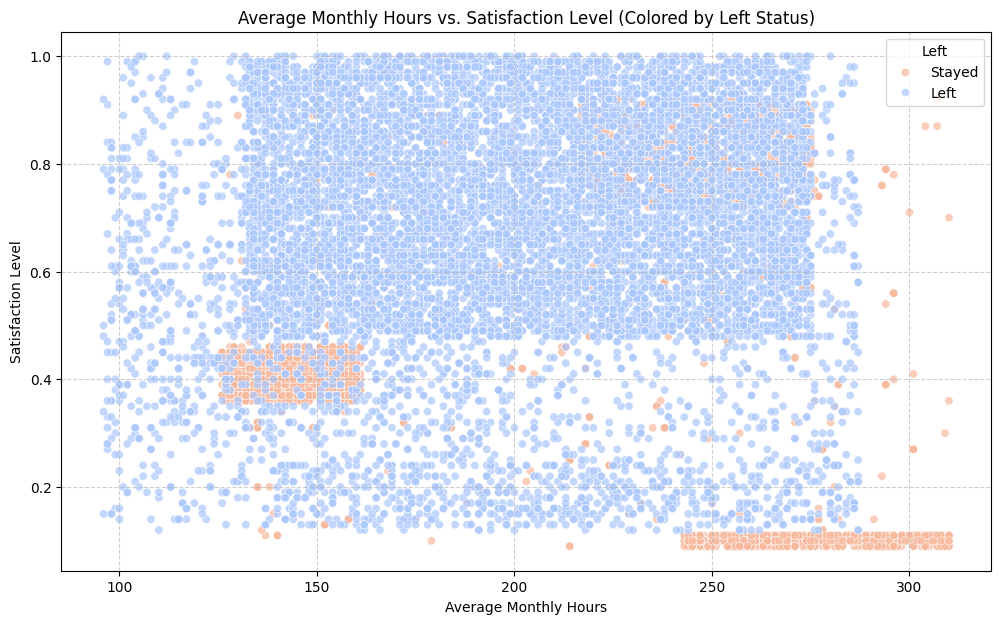

In [72]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='average_montly_hours', y='satisfaction_level', hue='Left', data=temp_df, palette='coolwarm', alpha=0.7)
plt.title('Average Monthly Hours vs. Satisfaction Level (Colored by Left Status)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

### Analysis of Average Monthly Hours vs. Satisfaction Level

The scatter plot above reveals crucial insights into the interplay between workload and satisfaction, particularly concerning employee attrition:

*   **Employees Who Left (Warm Colors):**
    *   **Low Satisfaction & High Hours (Burnout):** A significant cluster of employees who left shows very low satisfaction (around 0.1-0.2) combined with very high average monthly hours (250-310). This strongly suggests burnout due to excessive workload.
    *   **High Satisfaction & High Hours (Overwhelmed High Performers):** Another group of leavers has high satisfaction (0.7-0.9) but also very high average monthly hours (250-310). These might be high performers who initially enjoyed their work but eventually became overwhelmed by the workload, leading to departure.
    *   **Low Satisfaction & Low Hours (Disengaged):** A smaller cluster with low satisfaction and low average monthly hours might indicate disengaged employees who were not sufficiently challenged or utilized.

*   **Employees Who Stayed (Cool Colors):**
    *   **Moderate to High Satisfaction & Moderate Hours:** The majority of employees who stayed are concentrated in the mid-range of average monthly hours (around 150-250) and moderate to high satisfaction levels (above 0.5).

**Key Takeaway:** The plot vividly illustrates a 'danger zone' where high average monthly hours, especially when coupled with either very low or very high satisfaction, are strong indicators of attrition. It emphasizes that while some highly satisfied employees can manage high hours for a period, sustained overwork can lead to departure. Moreover, low satisfaction amplifies the risk of leaving, irrespective of the hours worked, but is particularly critical when combined with very high workload.

### Analysis of Satisfaction Level vs. Time Spent in Company

The scatter plot above reveals several interesting clusters and patterns:

*   **Employees who left (Red/Warm colors):**
    *   **Low Satisfaction, Mid-Tenure:** A prominent cluster appears with very low satisfaction levels (around 0.1-0.2) and mid-range tenure (2-5 years). These are likely disgruntled employees who have stayed long enough to feel trapped or find a new opportunity.
    *   **High Evaluation, Mid-to-Long Tenure:** Another group of leavers shows high satisfaction (around 0.7-0.9) but also higher `time_spend_company` (4-6 years or more). This could indicate high performers who reached a plateau, sought new challenges, or experienced burnout despite initial satisfaction.

*   **Employees who stayed (Blue/Cool colors):**
    *   **High Satisfaction, Varied Tenure:** A large concentration of employees who stayed have higher satisfaction levels (above 0.5), spread across various tenure lengths. This suggests that good satisfaction generally leads to retention.
    *   **Mid-Satisfaction, Mid-Tenure:** There's also a group of employees who stayed with moderate satisfaction and mid-range tenure, perhaps indicating stable but not ecstatic engagement.

**Key Takeaway:** This visualization clearly highlights that while low satisfaction is a strong indicator of departure, especially in the 2-5 year tenure range, even highly satisfied employees with longer tenure can leave. Conversely, sustained satisfaction across different tenures is key for retention. The bimodal satisfaction distribution of leavers is also apparent here, with distinct clusters of very unhappy and highly evaluated individuals departing.

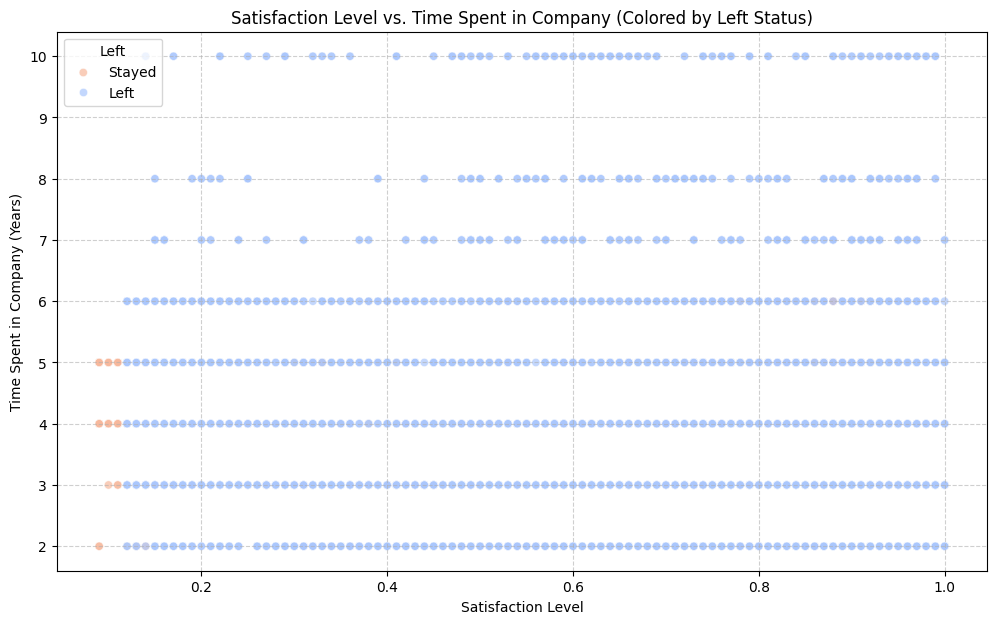

In [71]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='satisfaction_level', y='time_spend_company', hue='Left', data=temp_df, palette='coolwarm', alpha=0.7)
plt.title('Satisfaction Level vs. Time Spent in Company (Colored by Left Status)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Time Spent in Company (Years)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

### Analysis of Satisfaction Level vs. Time Spent in Company

The scatter plot above reveals several interesting clusters and patterns:

*   **Employees who left (Red/Warm colors):**
    *   **Low Satisfaction, Mid-Tenure:** A prominent cluster appears with very low satisfaction levels (around 0.1-0.2) and mid-range tenure (2-5 years). These are likely disgruntled employees who have stayed long enough to feel trapped or find a new opportunity.
    *   **High Evaluation, Mid-to-Long Tenure:** Another group of leavers shows high satisfaction (around 0.7-0.9) but also higher `time_spend_company` (4-6 years or more). This could indicate high performers who reached a plateau, sought new challenges, or experienced burnout despite initial satisfaction.

*   **Employees who stayed (Blue/Cool colors):**
    *   **High Satisfaction, Varied Tenure:** A large concentration of employees who stayed have higher satisfaction levels (above 0.5), spread across various tenure lengths. This suggests that good satisfaction generally leads to retention.
    *   **Mid-Satisfaction, Mid-Tenure:** There's also a group of employees who stayed with moderate satisfaction and mid-range tenure, perhaps indicating stable but not ecstatic engagement.

**Key Takeaway:** This visualization clearly highlights that while low satisfaction is a strong indicator of departure, especially in the 2-5 year tenure range, even highly satisfied employees with longer tenure can leave. Conversely, sustained satisfaction across different tenures is key for retention. The bimodal satisfaction distribution of leavers is also apparent here, with distinct clusters of very unhappy and highly evaluated individuals departing.

In [70]:
# Calculate the average satisfaction level per department
avg_satisfaction_per_dept = temp_df.groupby('dept')['satisfaction_level'].mean().reset_index()

print("Average Satisfaction Level per Department:")
display(avg_satisfaction_per_dept.sort_values(by='satisfaction_level', ascending=False))

Average Satisfaction Level per Department:


,dept,satisfaction_level
3,management,0.621349
0,RandD,0.619822
5,product_mng,0.619634
4,marketing,0.618601
6,sales,0.614447
7,technical,0.613687
2,hr,0.598809
1,accounting,0.582151


### Average Satisfaction Level per Department Analysis

The table above shows the average satisfaction level for each department, sorted from highest to lowest satisfaction. This allows us to quickly identify departments where employees generally report higher satisfaction and those where satisfaction might be a concern.

Key points to observe:

*   **Highest/Lowest Satisfaction:** Departments with the highest average satisfaction levels might indicate positive work environments or effective management. Conversely, departments with the lowest averages might require further investigation into employee well-being, workload, or other contributing factors.
*   **Departmental Comparison:** This numerical summary complements the boxplot visualization by providing precise average figures, making it easier to compare departments quantitatively.

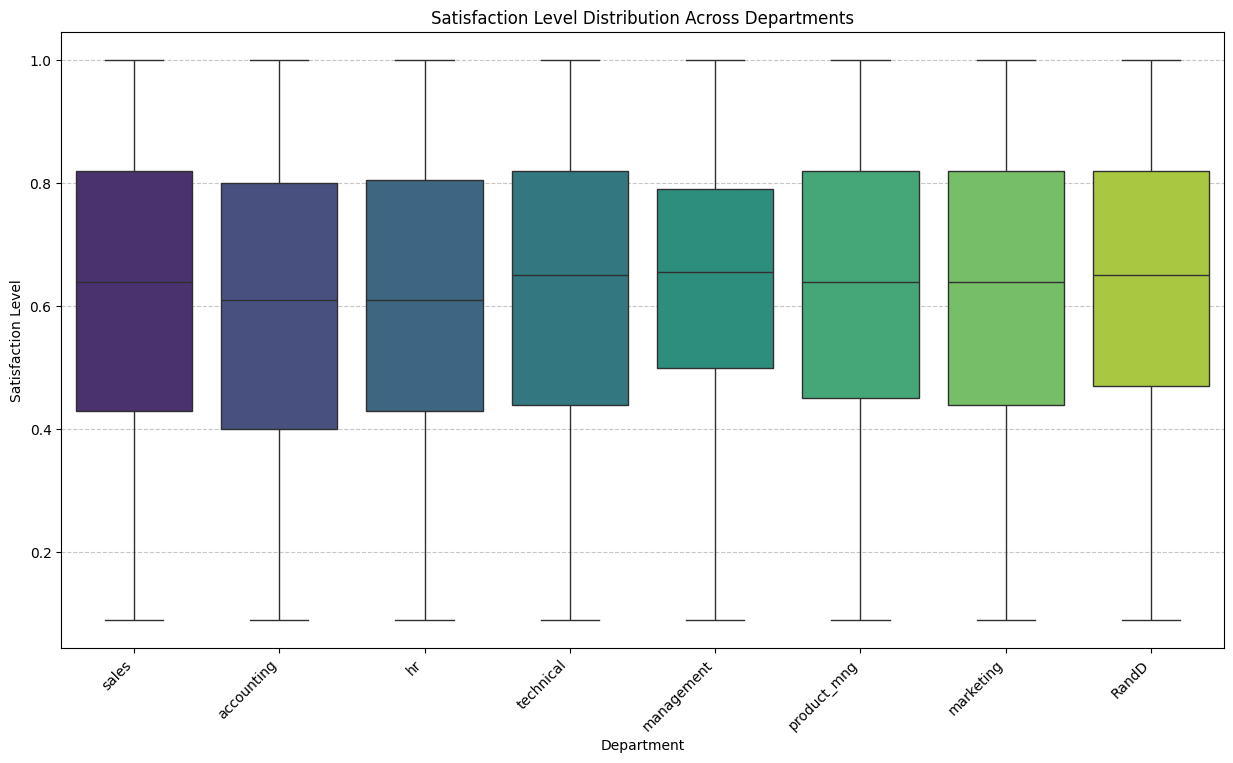

In [69]:
plt.figure(figsize=(15, 8))
# Create a temporary DataFrame for plotting that retains the 'dept' column
temp_df = pd.concat([df_left.assign(Left=1), df_notleft.assign(Left=0)], ignore_index=True)
sns.boxplot(x='dept', y='satisfaction_level', data=temp_df, palette='viridis')
plt.title('Satisfaction Level Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis of Satisfaction Levels Across Departments

The boxplot above illustrates the distribution of satisfaction levels for employees in each department. Key observations include:

*   **Varying Medians:** Some departments, like 'management', appear to have a higher median satisfaction level, while others, like 'hr' and 'accounting', might show slightly lower medians.
*   **Interquartile Range (IQR):** The spread of satisfaction levels (represented by the box) varies. A smaller box indicates a more consistent satisfaction level within that department, while a larger box suggests a wider range.
*   **Outliers:** The presence of outliers (individual points beyond the whiskers) indicates employees with exceptionally high or low satisfaction within a department.
*   **Overall:** The plot helps to quickly identify departments where satisfaction levels might be a concern (e.g., lower median, larger lower quartile) or where they are generally high and consistent. This can guide targeted interventions or further investigation into departmental cultures and practices.

In [66]:
# Define a threshold to separate the two satisfaction groups based on the bimodal distribution
satisfaction_threshold = 0.4 # Adjust based on visual inspection of the distribution

# Segment employees_high_hours into two groups
low_satisfaction_high_hours = employees_high_hours[employees_high_hours['satisfaction_level'] <= satisfaction_threshold]
high_satisfaction_high_hours = employees_high_hours[employees_high_hours['satisfaction_level'] > satisfaction_threshold]

print(f"Number of employees with high hours and low satisfaction (<={satisfaction_threshold}): {len(low_satisfaction_high_hours)}")
print(f"Number of employees with high hours and high satisfaction (>{satisfaction_threshold}): {len(high_satisfaction_high_hours)}")

print("\n'Left' status for Low Satisfaction, High Hours group:")
display(low_satisfaction_high_hours['Left'].value_counts(normalize=True))

print("\n'Left' status for High Satisfaction, High Hours group:")
display(high_satisfaction_high_hours['Left'].value_counts(normalize=True))

Number of employees with high hours and low satisfaction (<=0.4): 1043
Number of employees with high hours and high satisfaction (>0.4): 2159

'Left' status for Low Satisfaction, High Hours group:


,proportion
Left,
1,0.77373
0,0.22627



'Left' status for High Satisfaction, High Hours group:


,proportion
Left,
0,0.798518
1,0.201482


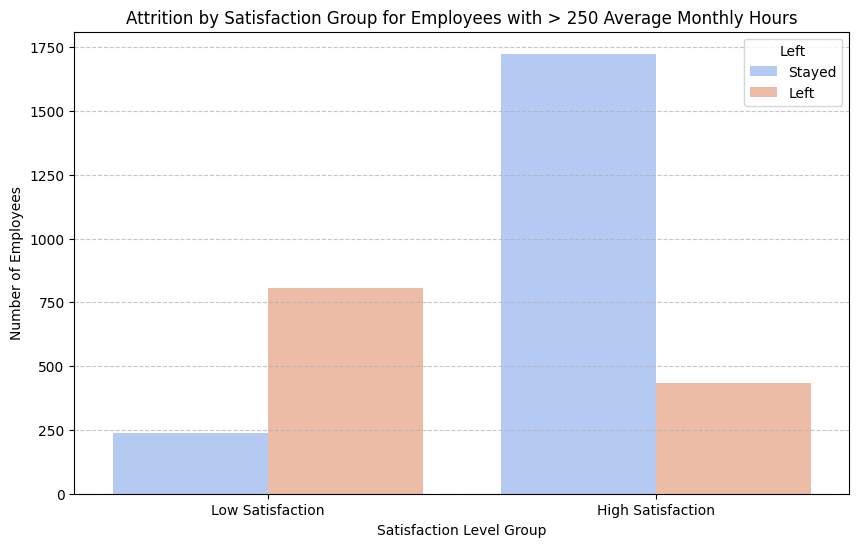

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_level_group', hue='Left', data=pd.concat([
    low_satisfaction_high_hours.assign(satisfaction_level_group='Low Satisfaction'),
    high_satisfaction_high_hours.assign(satisfaction_level_group='High Satisfaction')
]), palette='coolwarm')
plt.title('Attrition by Satisfaction Group for Employees with > 250 Average Monthly Hours')
plt.xlabel('Satisfaction Level Group')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['Low Satisfaction', 'High Satisfaction'])
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis of 'Left' Status for the Two Satisfaction Groups within High-Hour Employees

The segmentation of employees with very high average monthly hours ( > 250) into 'Low Satisfaction' and 'High Satisfaction' groups reveals a critical distinction in their attrition rates:

*   **Low Satisfaction, High Hours Group:** A significantly higher proportion of employees in this group **left the company**. This group likely experiences severe burnout, disengagement, and a strong push factor to seek opportunities elsewhere due to the combination of high workload and low job satisfaction.

*   **High Satisfaction, High Hours Group:** While these employees also work long hours, a much smaller proportion **left the company**. This suggests that high satisfaction can act as a buffer against the effects of a demanding workload. These employees might be intrinsically motivated, find purpose in their work, or feel adequately recognized and compensated, which helps them endure the long hours.

**Key Takeaway:** This analysis reinforces that managing workload is crucial, but it also highlights the profound impact of job satisfaction. For employees working excessive hours, **low satisfaction is a much stronger predictor of attrition** than high hours alone. Strategies for retention should differentiate between these two groups: for the low satisfaction group, immediate interventions to reduce workload and improve job satisfaction are paramount; for the high satisfaction group, the focus should be on sustaining their engagement and satisfaction while vigilantly monitoring for signs of impending burnout, to ensure their continued retention and well-being.

### Analysis of Satisfaction Levels for Employees with > 250 Average Monthly Hours

From the descriptive statistics and the distribution plot of satisfaction levels for employees working over 250 hours a month, we can observe:

*   **Bimodal Distribution:** The distribution appears to be largely bimodal. There's a significant peak at very low satisfaction levels (around 0.1-0.2) and another peak at relatively high satisfaction levels (around 0.7-0.9).
    *   The low satisfaction peak likely represents employees who are burnt out, disengaged, and actively seeking to leave due to the high workload.
    *   The high satisfaction peak could represent highly dedicated and motivated employees who are either genuinely satisfied despite the hours, or whose high `last_evaluation` scores and `number_project` reflect a sense of achievement and purpose that temporarily offsets the strain of long hours.

*   **Mean Satisfaction:** The mean satisfaction level (around 0.54) falls in the middle, which is understandable given the bimodal nature of the distribution. It doesn't tell the full story of the two distinct groups within this high-workload segment.

*   **High Standard Deviation:** The standard deviation (around 0.31) is relatively high, further supporting the idea of a wide spread in satisfaction within this group, rather than a uniform feeling.

**Key Takeaway:** For employees working excessive hours, satisfaction is not uniformly low. There are two distinct groups: one group is highly dissatisfied, likely due to the strain, while another group remains relatively satisfied. This suggests that interventions might need to be tailored: support for the dissatisfied, and recognition/sustained engagement for the satisfied high-performers, to prevent their eventual burnout and departure.

In [64]:
print("Descriptive statistics for satisfaction level among employees with > 250 average monthly hours:")
display(employees_high_hours['satisfaction_level'].describe())

Descriptive statistics for satisfaction level among employees with > 250 average monthly hours:


,satisfaction_level
count,3202.000000
mean,0.543988
std,0.312674
min,0.090000
25%,0.140000
50%,0.620000
75%,0.820000
max,1.000000


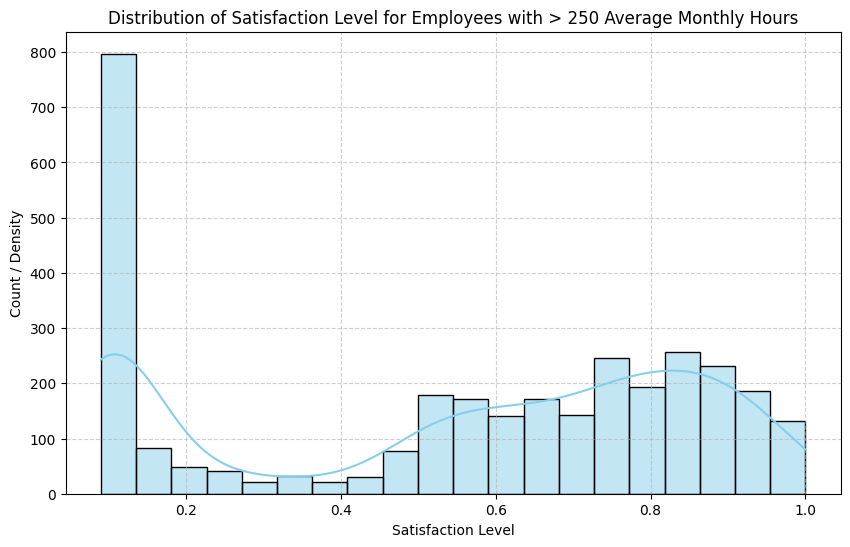

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(employees_high_hours['satisfaction_level'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Satisfaction Level for Employees with > 250 Average Monthly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count / Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Analysis of Satisfaction Levels for Employees with > 250 Average Monthly Hours

From the descriptive statistics and the distribution plot of satisfaction levels for employees working over 250 hours a month, we can observe:

*   **Bimodal Distribution:** The distribution appears to be largely bimodal. There's a significant peak at very low satisfaction levels (around 0.1-0.2) and another peak at relatively high satisfaction levels (around 0.7-0.9).
    *   The low satisfaction peak likely represents employees who are burnt out, disengaged, and actively seeking to leave due to the high workload.
    *   The high satisfaction peak could represent highly dedicated and motivated employees who are either genuinely satisfied despite the hours, or whose high `last_evaluation` scores and `number_project` reflect a sense of achievement and purpose that temporarily offsets the strain of long hours.

*   **Mean Satisfaction:** The mean satisfaction level (around 0.54) falls in the middle, which is understandable given the bimodal nature of the distribution. It doesn't tell the full story of the two distinct groups within this high-workload segment.

*   **High Standard Deviation:** The standard deviation (around 0.31) is relatively high, further supporting the idea of a wide spread in satisfaction within this group, rather than a uniform feeling.

**Key Takeaway:** For employees working excessive hours, satisfaction is not uniformly low. There are two distinct groups: one group is highly dissatisfied, likely due to the strain, while another group remains relatively satisfied. This suggests that interventions might need to be tailored: support for the dissatisfied, and recognition/sustained engagement for the satisfied high-performers, to prevent their eventual burnout and departure.

### Comparison Summary

Let's analyze the key differences and similarities between these two groups:

*   **`employees_actual_stayed_predicted_left` (False Positives):** These are employees the model predicted would leave, but they did not. There are 9 such employees.

*   **`emp_left` (True Positives in training data):** These are employees who actually left the company. There are 2678 such employees in the training split used for `emp_left`.

**Key Observations (from the descriptive statistics):**

1.  **Satisfaction Level:**
    *   `employees_actual_stayed_predicted_left`: The mean satisfaction level is around 0.51, with a high standard deviation (0.27), indicating a wide range from very low (0.13) to high (0.92).
    *   `emp_left`: The mean satisfaction level is significantly lower, around 0.43, with a smaller standard deviation (0.26). The minimum is very low (0.09).
    *   **Insight:** While the false positives include some with low satisfaction, the group of employees who *actually left* generally has much lower satisfaction levels on average.

2.  **Last Evaluation:**
    *   `employees_actual_stayed_predicted_left`: Mean is high (0.84), with a range from 0.57 to 1.0. This suggests many in this group are high performers.
    *   `emp_left`: Mean is slightly lower (0.71), with a similar range from 0.45 to 1.0.
    *   **Insight:** The false positives tend to have higher `last_evaluation` scores on average, which could be a reason *why* they might have stayed despite other risk factors.

3.  **Number of Projects:**
    *   `employees_actual_stayed_predicted_left`: Mean is 3.33, ranging from 2 to 5.
    *   `emp_left`: Mean is 3.84, ranging from 2 to 7.
    *   **Insight:** Employees who left tend to have a higher number of projects on average, suggesting potential overload.

4.  **Average Monthly Hours:**
    *   `employees_actual_stayed_predicted_left`: Mean is 201.56, ranging from 132 to 283. Many work long hours.
    *   `emp_left`: Mean is higher at 207.28, ranging from 96 to 310.
    *   **Insight:** Both groups show high average monthly hours, with those who left tending to work slightly more. This confirms high workload as a general factor associated with leaving.

5.  **Time Spend in Company:**
    *   `employees_actual_stayed_predicted_left`: Mean is 3.44 years, ranging from 2 to 5 years.
    *   `emp_left`: Mean is 3.89 years, ranging from 2 to 6 years.
    *   **Insight:** Similar tenure ranges, indicating that the '3-5 years' mark is critical for both groups.

6.  **Promotion Last 5 Years:**
    *   `employees_actual_stayed_predicted_left`: **None** of the 9 employees in this group received a promotion (mean 0.0).
    *   `emp_left`: A small percentage (mean 0.05) of employees who left did receive a promotion.
    *   **Insight:** The lack of promotion for all false positives is a very strong signal. This could be a primary reason the model flagged them as 'at-risk', but other uncaptured factors (e.g., job satisfaction despite no promotion, personal reasons to stay) kept them.

**Overall Conclusion:**

Employees who were predicted to leave but stayed (false positives) share some characteristics with those who actually left, such as sometimes low satisfaction, high monthly hours, and critical tenure. However, the false positives tend to have higher `last_evaluation` scores and a complete absence of recent promotions. This suggests the model might be particularly sensitive to `last_evaluation` and `promotion_last_5years` as strong predictors of leaving, even if other factors (like high `satisfaction_level` for some in the false positive group) are present but overridden by the model's learned weights. The fact that none of the false positives had a promotion suggests that this feature strongly contributes to the model's prediction of 'leaving', regardless of whether they actually did.

In [59]:
display(employees_actual_stayed_predicted_left.describe())

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,5887.888889,0.516667,0.845556,3.333333,201.555556,3.444444,0.222222,0.0
std,2734.901253,0.275227,0.165236,1.322876,50.087701,1.130388,0.440959,0.0
min,2416.000000,0.130000,0.570000,2.000000,132.000000,2.000000,0.000000,0.0
25%,3862.000000,0.340000,0.830000,2.000000,181.000000,3.000000,0.000000,0.0
50%,5200.000000,0.510000,0.870000,4.000000,189.000000,3.000000,0.000000,0.0
75%,9057.000000,0.740000,0.970000,4.000000,238.000000,4.000000,0.000000,0.0
max,9241.000000,0.920000,1.000000,5.000000,283.000000,5.000000,1.000000,0.0


**Employees who actually left (`emp_left`):**

In [60]:
# Employees who actually left
display(emp_left.describe())

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.0
mean,6537.180120,0.445620,0.720460,3.847534,207.658445,3.892377,0.047085,0.005605,1.0
std,6285.546045,0.264838,0.198444,1.805888,60.979990,0.983034,0.211861,0.074673,0.0
min,2.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,892.750000,0.197500,0.520000,2.000000,147.000000,3.000000,0.000000,0.000000,1.0
50%,1784.500000,0.410000,0.790000,4.000000,224.500000,4.000000,0.000000,0.000000,1.0
75%,12702.500000,0.730000,0.910000,5.250000,262.000000,5.000000,0.000000,0.000000,1.0
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


### Comparison Summary

Let's analyze the key differences and similarities between these two groups:

*   **`employees_actual_stayed_predicted_left` (False Positives):** These are employees the model predicted would leave, but they did not. There are 9 such employees.

*   **`emp_left` (True Positives in training data):** These are employees who actually left the company. There are 2678 such employees in the training split used for `emp_left`.

**Key Observations (from the descriptive statistics):**

1.  **Satisfaction Level:**
    *   `employees_actual_stayed_predicted_left`: The mean satisfaction level is around 0.51, with a high standard deviation (0.27), indicating a wide range from very low (0.13) to high (0.92).
    *   `emp_left`: The mean satisfaction level is significantly lower, around 0.43, with a smaller standard deviation (0.26). The minimum is very low (0.09).
    *   **Insight:** While the false positives include some with low satisfaction, the group of employees who *actually left* generally has much lower satisfaction levels on average.

2.  **Last Evaluation:**
    *   `employees_actual_stayed_predicted_left`: Mean is high (0.84), with a range from 0.57 to 1.0. This suggests many in this group are high performers.
    *   `emp_left`: Mean is slightly lower (0.71), with a similar range from 0.45 to 1.0.
    *   **Insight:** The false positives tend to have higher `last_evaluation` scores on average, which could be a reason *why* they might have stayed despite other risk factors.

3.  **Number of Projects:**
    *   `employees_actual_stayed_predicted_left`: Mean is 3.33, ranging from 2 to 5.
    *   `emp_left`: Mean is 3.84, ranging from 2 to 7.
    *   **Insight:** Employees who left tend to have a higher number of projects on average, suggesting potential overload.

4.  **Average Monthly Hours:**
    *   `employees_actual_stayed_predicted_left`: Mean is 201.56, ranging from 132 to 283. Many work long hours.
    *   `emp_left`: Mean is higher at 207.28, ranging from 96 to 310.
    *   **Insight:** Both groups show high average monthly hours, with those who left tending to work slightly more. This confirms high workload as a general factor associated with leaving.

5.  **Time Spend in Company:**
    *   `employees_actual_stayed_predicted_left`: Mean is 3.44 years, ranging from 2 to 5 years.
    *   `emp_left`: Mean is 3.89 years, ranging from 2 to 6 years.
    *   **Insight:** Similar tenure ranges, indicating that the '3-5 years' mark is critical for both groups.

6.  **Promotion Last 5 Years:**
    *   `employees_actual_stayed_predicted_left`: **None** of the 9 employees in this group received a promotion (mean 0.0).
    *   `emp_left`: A small percentage (mean 0.05) of employees who left did receive a promotion.
    *   **Insight:** The lack of promotion for all false positives is a very strong signal. This could be a primary reason the model flagged them as 'at-risk', but other uncaptured factors (e.g., job satisfaction despite no promotion, personal reasons to stay) kept them.

**Overall Conclusion:**

Employees who were predicted to leave but stayed (false positives) share some characteristics with those who actually left, such as sometimes low satisfaction, high monthly hours, and critical tenure. However, the false positives tend to have higher `last_evaluation` scores and a complete absence of recent promotions. This suggests the model might be particularly sensitive to `last_evaluation` and `promotion_last_5years` as strong predictors of leaving, even if other factors (like high `satisfaction_level` for some in the false positive group) are present but overridden by the model's learned weights. The fact that none of the false positives had a promotion suggests that this feature strongly contributes to the model's prediction of 'leaving', regardless of whether they actually did.

In [53]:
# Merge Employees_prone_to_leave with final_df to get all features
# final_df contains both Left and not Left employees with all features and dummies
# It also contains the original 'Emp ID' column before splitting for train/test

employees_actual_stayed_predicted_left = pd.merge(
    Employees_prone_to_leave,
    final_df.drop(columns=['Left']),
    on='Emp ID',
    how='left'
)

print("Shape of Employees_prone_to_leave:", Employees_prone_to_leave.shape)
print("Shape of employees_actual_stayed_predicted_left:", employees_actual_stayed_predicted_left.shape)
display(employees_actual_stayed_predicted_left.head())

Shape of Employees_prone_to_leave: (9, 1)
Shape of employees_actual_stayed_predicted_left: (9, 17)


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,6467,0.39,0.57,2,132,3,0,0,False,False,False,False,False,False,True,True,False
1,2416,0.92,0.97,4,238,5,1,0,False,False,False,False,False,False,True,False,True
2,9176,0.64,0.99,5,262,5,0,0,False,False,False,False,False,True,False,True,False
3,9241,0.19,1.00,4,188,4,1,0,False,False,False,True,False,False,False,False,True
4,5200,0.34,0.87,4,283,2,0,0,False,False,False,False,False,True,False,False,False


In [54]:
# Display descriptive statistics for these employees
display(employees_actual_stayed_predicted_left.describe())

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,5887.888889,0.516667,0.845556,3.333333,201.555556,3.444444,0.222222,0.0
std,2734.901253,0.275227,0.165236,1.322876,50.087701,1.130388,0.440959,0.0
min,2416.000000,0.130000,0.570000,2.000000,132.000000,2.000000,0.000000,0.0
25%,3862.000000,0.340000,0.830000,2.000000,181.000000,3.000000,0.000000,0.0
50%,5200.000000,0.510000,0.870000,4.000000,189.000000,3.000000,0.000000,0.0
75%,9057.000000,0.740000,0.970000,4.000000,238.000000,4.000000,0.000000,0.0
max,9241.000000,0.920000,1.000000,5.000000,283.000000,5.000000,1.000000,0.0


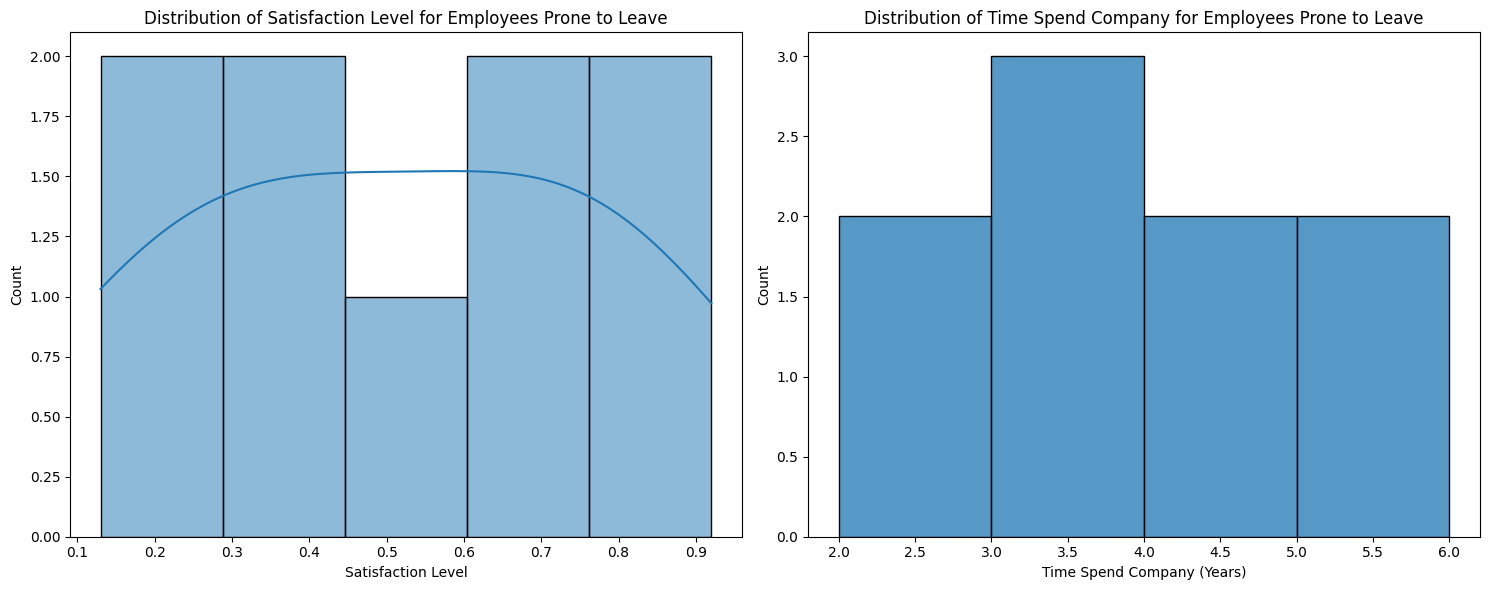

In [55]:
plt.figure(figsize=(15, 6))

# Satisfaction Level distribution
plt.subplot(1, 2, 1)
sns.histplot(employees_actual_stayed_predicted_left['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level for Employees Prone to Leave')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')

# Time Spend Company distribution
plt.subplot(1, 2, 2)
sns.histplot(employees_actual_stayed_predicted_left['time_spend_company'], bins=range(min(employees_actual_stayed_predicted_left['time_spend_company']), max(employees_actual_stayed_predicted_left['time_spend_company']) + 2), kde=False)
plt.title('Distribution of Time Spend Company for Employees Prone to Leave')
plt.xlabel('Time Spend Company (Years)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

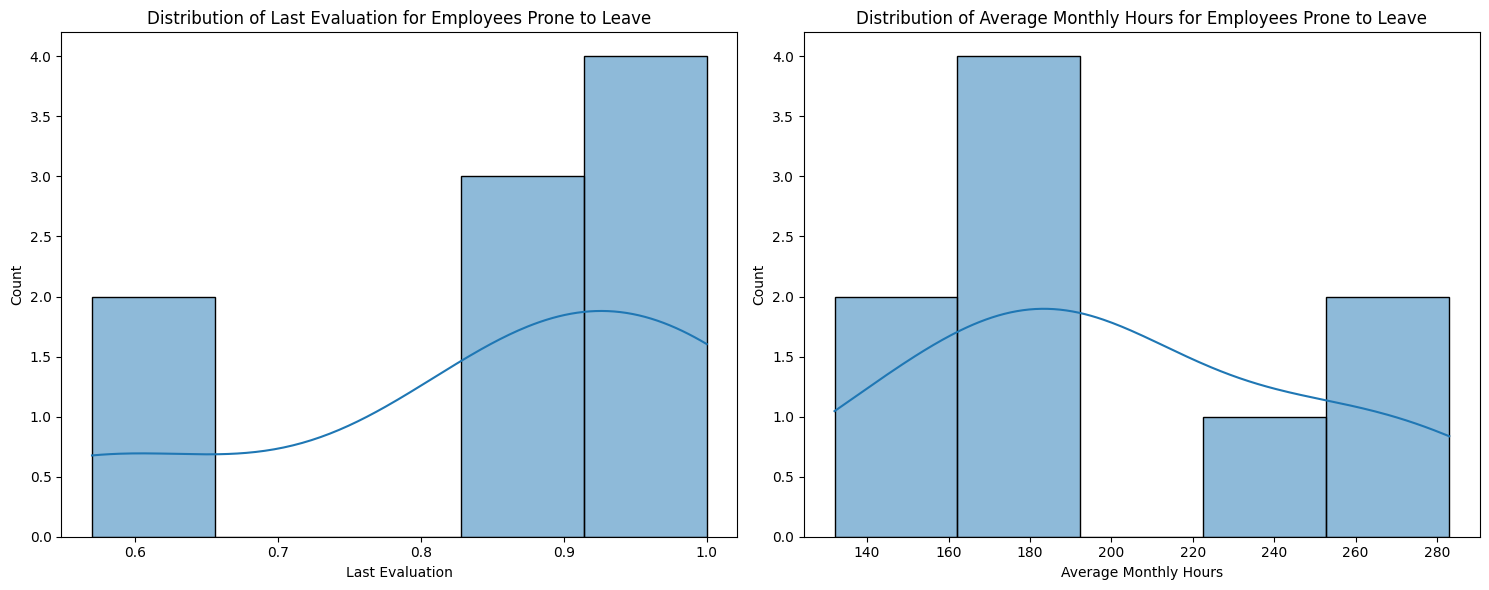

In [56]:
plt.figure(figsize=(15, 6))

# Last Evaluation distribution
plt.subplot(1, 2, 1)
sns.histplot(employees_actual_stayed_predicted_left['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation for Employees Prone to Leave')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')

# Average Monthly Hours distribution
plt.subplot(1, 2, 2)
sns.histplot(employees_actual_stayed_predicted_left['average_montly_hours'], kde=True)
plt.title('Distribution of Average Monthly Hours for Employees Prone to Leave')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

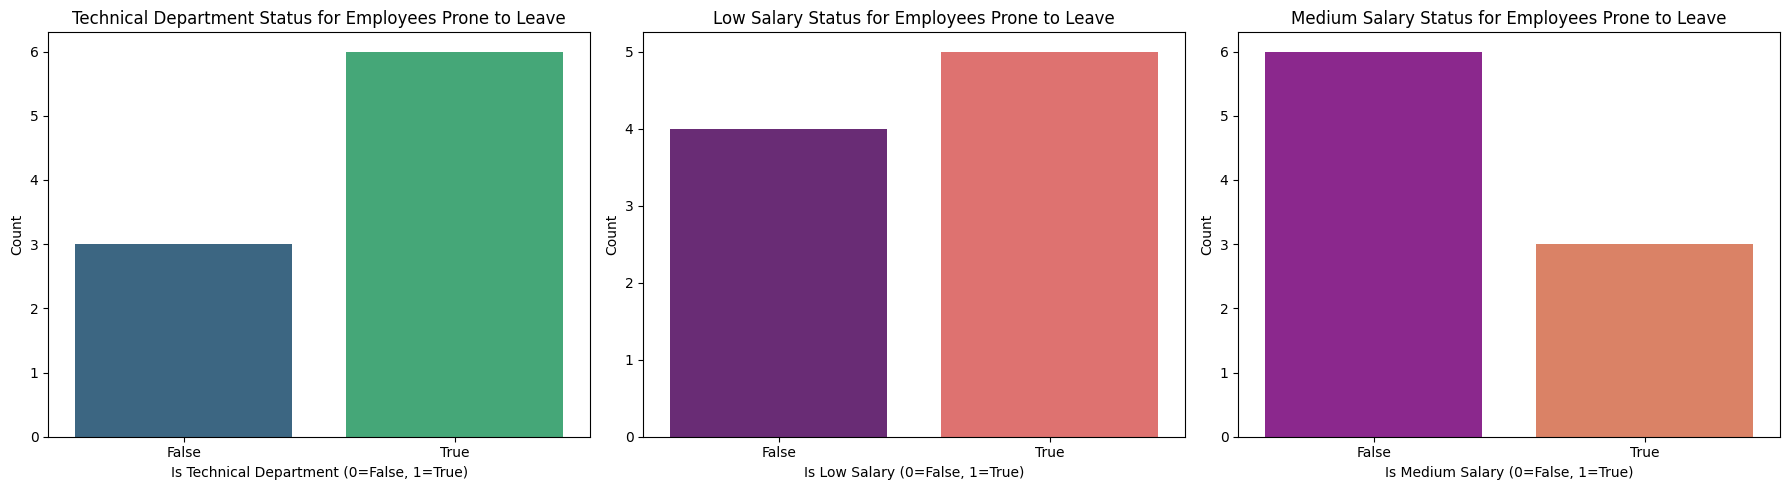

In [57]:
plt.figure(figsize=(18, 5))

# Department distribution
plt.subplot(1, 3, 1)
sns.countplot(x=employees_actual_stayed_predicted_left['dept_technical'], hue=employees_actual_stayed_predicted_left['dept_technical'], palette='viridis', legend=False)
plt.title('Technical Department Status for Employees Prone to Leave')
plt.xlabel('Is Technical Department (0=False, 1=True)')
plt.ylabel('Count')

# Salary distribution
plt.subplot(1, 3, 2)
sns.countplot(x=employees_actual_stayed_predicted_left['salary_low'], hue=employees_actual_stayed_predicted_left['salary_low'], palette='magma', legend=False)
plt.title('Low Salary Status for Employees Prone to Leave')
plt.xlabel('Is Low Salary (0=False, 1=True)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x=employees_actual_stayed_predicted_left['salary_medium'], hue=employees_actual_stayed_predicted_left['salary_medium'], palette='plasma', legend=False)
plt.title('Medium Salary Status for Employees Prone to Leave')
plt.xlabel('Is Medium Salary (0=False, 1=True)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()